In [1]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import tensorly as ts
from scipy import stats
from scipy.spatial import distance
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# The manipulation and extraction procedures of the .json files obtained from Sonar output is copied from
# https://github.com/fga-eps-mds/Analytics, developed by Gabriel Filipe Manso in context of teacher assistant activities
# in EPS and MDS courses in 2020.2 academic period, under supervising by prof. Hilmer R. Neri in University of Brazilia,
# Faculty of Gama- Software Engineering graduate course.
# https://github.com/fga-eps-mds/A-Disciplina-MDS-EPS/blob/master/PlanosDeEnsino/EPS-cronograma-2020-2-hrn.md
# https://github.com/fga-eps-mds/A-Disciplina-MDS-EPS/blob/master/PlanosDeEnsino/MDS-cronograma-hrn.md
from scipy.stats import mannwhitneyu

%config InlineBackend.figure_format ='retina'

sns.set(font_scale=1.5)

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
repos = ['2020_2-Projeto-Kokama-Traducao',
         '2020_2-Projeto-Kokama-Usuario',
         '2020_2-Projeto-Kokama-Ensino',
         '2020_2-Projeto-Kokama-Front-end']
language = [['2020_2-Projeto-Kokama-Traducao', 'py'],
            ['2020_2-Projeto-Kokama-Usuario', 'py'],
            ['2020_2-Projeto-Kokama-Ensino', 'py'],
            ['2020_2-Projeto-Kokama-Front-end', 'ts']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]


In [5]:
# jsons = glob('siged-raw-data-08-05-2021/*.json')

jsons = glob('data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/*.json')

In [6]:
jsons

['data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-05-24.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Front-end-2021-05-24.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Usuario-2021-05-16.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Traducao-2021-05-24.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Usuario-2021-04-17.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Front-end-2021-04-05.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Traducao-2021-04-05.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-05-14.json',
 'data/fga-eps-mds-2020-2-data/kokama/analytics-raw-data/fga

In [7]:
def read_json(json_path):

    with open(json_path) as json_file:
        json_obj = json.load(json_file)

    return json_obj

In [8]:
def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-(.*?)-(\d+-\d+-\d+).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [9]:
base_component_df = create_base_component_df(jsons)

In [10]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
72,complexity,37,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
73,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
74,functions,15,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
75,ncloc,726,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
76,reliability_rating,1.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
77,security_rating,1.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
78,comment_lines_density,7.8,False,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
79,files,30,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
56,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-05-14
57,functions,15,NaN,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-05-14


In [11]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [12]:
def metric_per_file(json):

    file_json = []

    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)

    return file_json

In [13]:
def generate_file_dataframe(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [14]:
def generate_file_dataframe_per_release(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [15]:
def create_file_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        file_component_data = metric_per_file(file_component)
        file_name = os.path.basename(i)

        file_repository = file_name[12:-16]
        file_lenguage = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list,
                                                                file_component_data,
                                                                language_extension = file_lenguage)
        file_component_df['filename'] = file_name

        df = df.append(file_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-(.*?)-(\d+-\d+-\d+).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = pd.to_datetime(aux_df[2], format = '%Y-%m-%d')

    df = df.sort_values(by=['repository', 'version'])

    return df

In [16]:
file_component_df = create_file_df(jsons)

In [17]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
197,exercise/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
198,history/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
199,tests/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
200,tests/history/__init__.py,0,0,0.0,0.0,NaN,1,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
201,exercise/admin.py,0,0,0.0,0.0,NaN,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
202,history/admin.py,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
203,exercise/apps.py,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
204,history/apps.py,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
205,learn/asgi.py,0,0,66.7,0.0,NaN,4,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14
206,history/forms.py,0,0,0.0,0.0,NaN,13,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Ensino-2021-...,2020_2-Projeto-Kokama-Ensino,2021-04-14


In [18]:
# Create dataframe per repository

repository_dataframes = {}

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df

repository_dataframes.keys()

dict_keys(['2020_2-Projeto-Kokama-Traducao', '2020_2-Projeto-Kokama-Usuario', '2020_2-Projeto-Kokama-Ensino', '2020_2-Projeto-Kokama-Front-end'])

In [19]:
# Defining measure em1 calculation, where em1 = density of non-complex file
def m1(df):
    m0 = np.median(df['complexity'].astype(float)/df['functions'].astype(float))
    m1 = df['complexity'].astype(float)
    m2 = df['functions'].astype(float)
    m3 = len(df) # total files

    #  intervals for em1 thresholds
    x = np.array([0, m0])
    y = np.array([1, 0])

    # Defining intervals for em1 interpretation(numeric interpolation). It indicates quality score
    IF1 = np.interp(list(((m1/m2) <= m0)[(m2 > 0)]),x, y)

    em1 = sum(IF1)/m3

    return em1

def em1(df):

    em1 = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)

    return em1

In [20]:
def m2(df):

    # Defining metrics for measure em2, where em2 = density of commented files
    m3 = len(df) # total files
    m4 = df['comment_lines_density'].astype(float)

    #  intervals for em1 thresholds
    x = np.array([0.1, 0.3])
    y = np.array([1, 0])

    # Defining intervals for em2 interpretation(numeric interpolation). It indicates quality score
    em2i = []
    for if2i in m4:
        if 10 <= if2i <= 30:
            em2i.append(np.interp(if2i/100,x, y))
        else:
            em2i.append(0)

    m2 = np.sum(em2i)/m3

    return em2

def em2(df):

    em2 = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)

    return em2


In [21]:
def em3(df):

    # Defining metrics for measure em3,where ma3 = absence of duplication on file (density)
    m3 = len(df) # total files
    m5 = df['duplicated_lines_density'].astype(float)

    #  intervals for em1 thresholds
    x = np.array([0, 0.05])
    y = np.array([1, 0])

    # Intervals for ma3 interpretation
    em3i = []
    for if3i in m5:
        if  if3i < 5:
            em3i.append(np.interp(if3i/100,x, y))
        else:
            em3i.append(0)

    em3 = np.sum(em3i)/m3

    return em3

In [22]:
def create_metrics_df(df):

    version_vec = df['version'].unique()

    em1_list = []
    em2_list = []
    em3_list = []
    repository_list = []
    version_list = []

    metrics_df = pd.DataFrame()

    for version in version_vec:

        version_df = df[df['version'] == version]

        em1_list.append(em1(version_df))
        em2_list.append(em2(version_df))
        em3_list.append(em3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    metrics_df = pd.DataFrame({'em1': em1_list,
                               'em2': em2_list,
                               'em3': em3_list,
                               'repository': repository_list,
                               'version': version_list})

    return metrics_df

In [23]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [24]:
repository_dataframes["2020_2-Projeto-Kokama-Front-end"].head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
423,projeto-kokama/App.tsx,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-03-23
424,projeto-kokama/src/config/constants.ts,0,0,0.0,0.0,NaN,2,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-03-23
425,projeto-kokama/src/index.tsx,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-03-23
426,projeto-kokama/src/screens/Translation/index.tsx,18,37,3.4,0.0,NaN,225,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-03-23
427,projeto-kokama/src/screens/Translation/interfa...,0,0,0.0,0.0,NaN,10,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-03-23
428,projeto-kokama/src/screens/Translation/styles.ts,0,1,0.6,0.0,NaN,176,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-03-23
99,projeto-kokama/src/api/Api.ts,0,0,0.0,0.0,NaN,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-04-05
100,projeto-kokama/App.tsx,9,9,4.9,0.0,NaN,98,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-04-05
101,projeto-kokama/src/assets/Colors.ts,0,0,0.0,0.0,NaN,11,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-04-05
102,projeto-kokama/src/config/constants.ts,0,0,0.0,0.0,NaN,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Projeto-Kokama-Front-end-20...,2020_2-Projeto-Kokama-Front-end,2021-04-05


In [25]:
repository_metrics["2020_2-Projeto-Kokama-Front-end"]

,em1,em2,em3,repository,version
0,0.500000,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23
1,0.545455,0.045455,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05
2,0.515152,0.030303,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11
3,0.515152,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15
4,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17
5,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-22
6,0.619048,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-24


In [26]:
repository_metrics["2020_2-Projeto-Kokama-Traducao"]

,em1,em2,em3,repository,version
0,0.173913,0.086957,1.0,2020_2-Projeto-Kokama-Traducao,2021-03-23
1,0.190476,0.095238,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-05
2,0.285714,0.142857,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-06
3,0.285714,0.142857,1.0,2020_2-Projeto-Kokama-Traducao,2021-05-14
4,0.307692,0.153846,1.0,2020_2-Projeto-Kokama-Traducao,2021-05-24


In [27]:
repository_metrics["2020_2-Projeto-Kokama-Usuario"]

,em1,em2,em3,repository,version
0,0.000000,0.000000,1.0,2020_2-Projeto-Kokama-Usuario,2021-04-17
1,0.200000,0.080000,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-14
2,0.200000,0.080000,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-15
3,0.304348,0.130435,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-16
4,0.333333,0.166667,1.0,2020_2-Projeto-Kokama-Usuario,2021-05-24


In [28]:
repository_metrics["2020_2-Projeto-Kokama-Ensino"]

,em1,em2,em3,repository,version
0,0.230769,0.076923,1.0,2020_2-Projeto-Kokama-Ensino,2021-04-14
1,0.318182,0.090909,1.0,2020_2-Projeto-Kokama-Ensino,2021-05-14
2,0.318182,0.090909,1.0,2020_2-Projeto-Kokama-Ensino,2021-05-15
3,0.350000,0.100000,1.0,2020_2-Projeto-Kokama-Ensino,2021-05-24


In [29]:
repos_metrics_list = []

repos_metrics_list.append(repository_metrics["2020_2-Projeto-Kokama-Front-end"])
repos_metrics_list.append(repository_metrics["2020_2-Projeto-Kokama-Traducao"])
repos_metrics_list.append(repository_metrics["2020_2-Projeto-Kokama-Usuario"])
repos_metrics_list.append(repository_metrics["2020_2-Projeto-Kokama-Ensino"])

#Printing frontend_metrics
#frontend_metrics


repos_metrics_list[0]

,em1,em2,em3,repository,version
0,0.500000,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23
1,0.545455,0.045455,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05
2,0.515152,0.030303,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11
3,0.515152,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15
4,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17
5,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-22
6,0.619048,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-24


## Plotting em1, em2 and em3 in frontend repository

### em1

(0.625, 0.7)

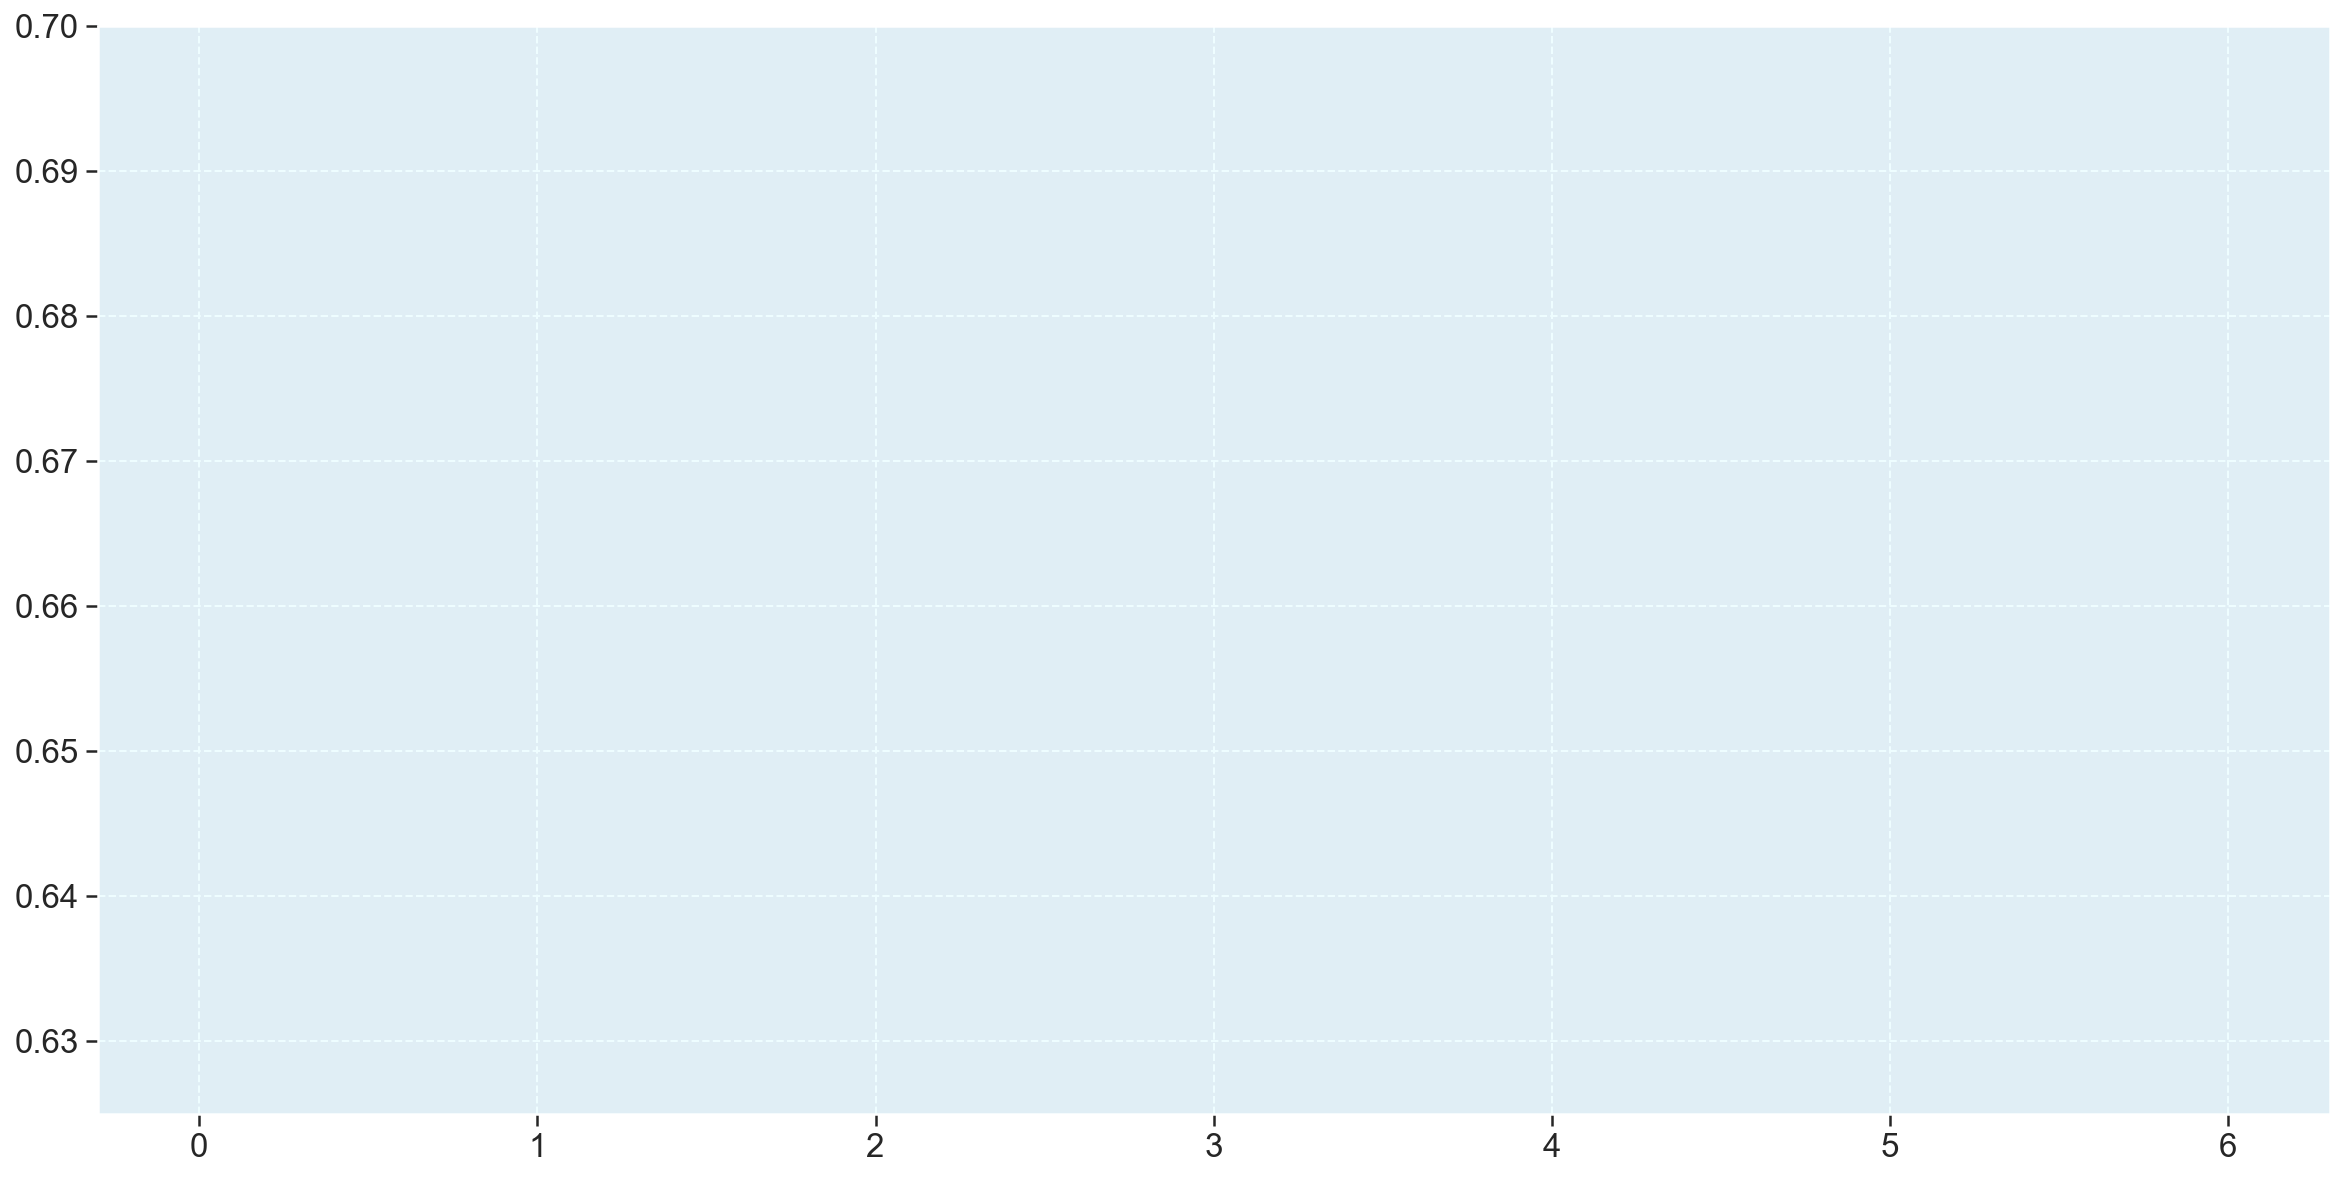

In [30]:
fig = plt.figure(figsize=(20, 10))

#plt.plot(repos_metrics_list[0]['em1'], linewidth=3, marker='o', markersize=10)
plt.plot(repos_metrics_list[0]['em1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.625,.7, color="#c9f9ff", alpha=0.3)

plt.ylim(.625,.7)

### em2

(-0.001, 0.016)

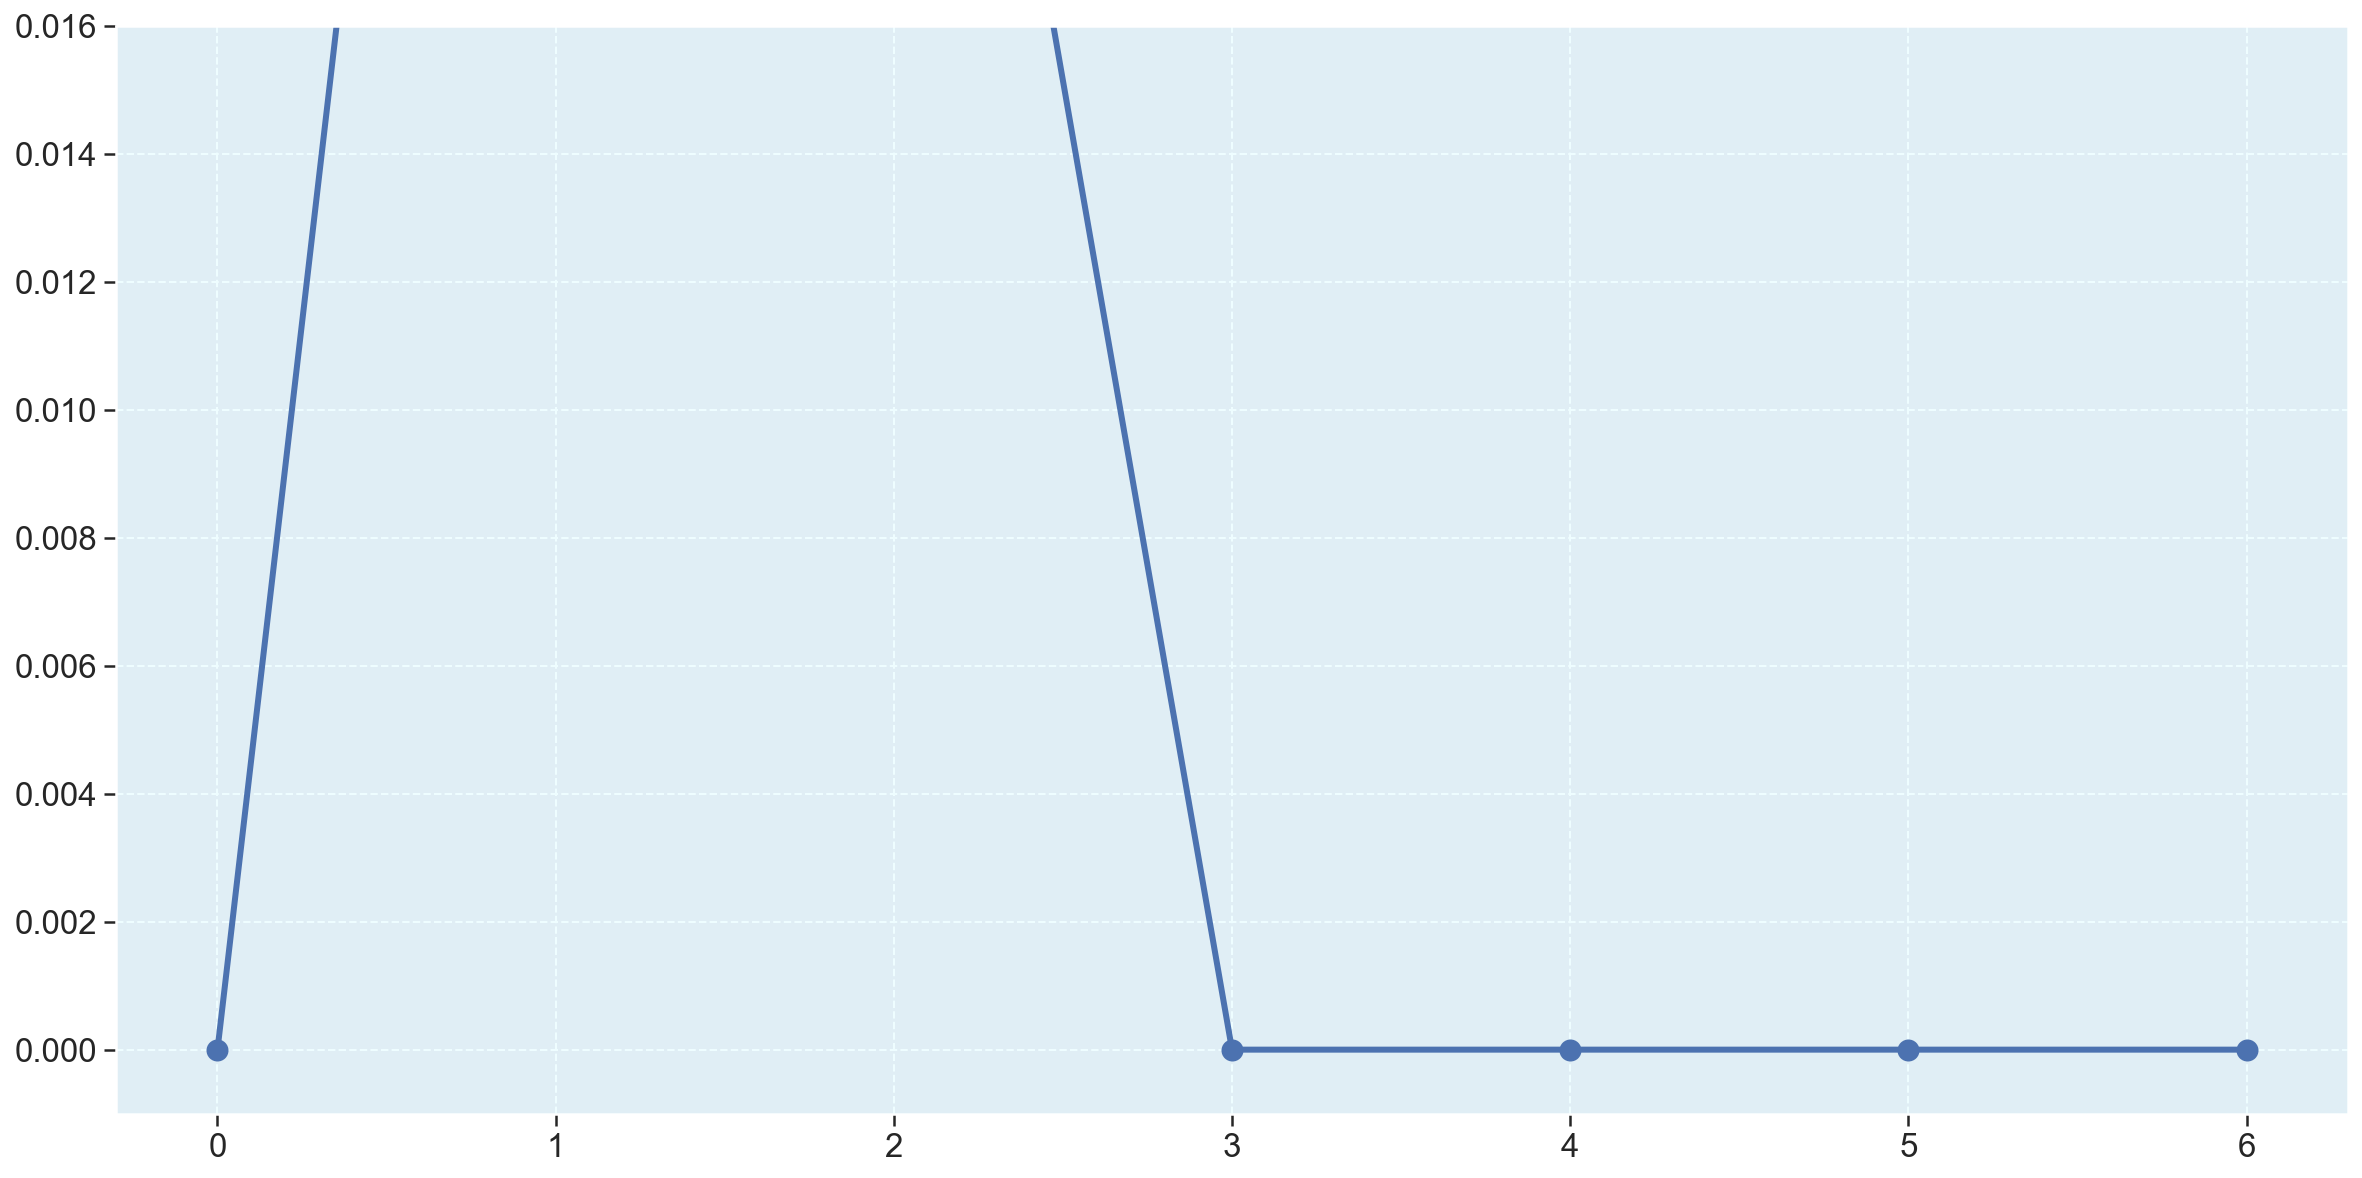

In [31]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repos_metrics_list[0]['em2'], linewidth=3, marker='o', markersize=10)


# Background color
plt.axhspan(-.001,.016, color="#c9f9ff", alpha=0.3)

plt.ylim(-.001,.016)

### em3

(0.95, 1.01)

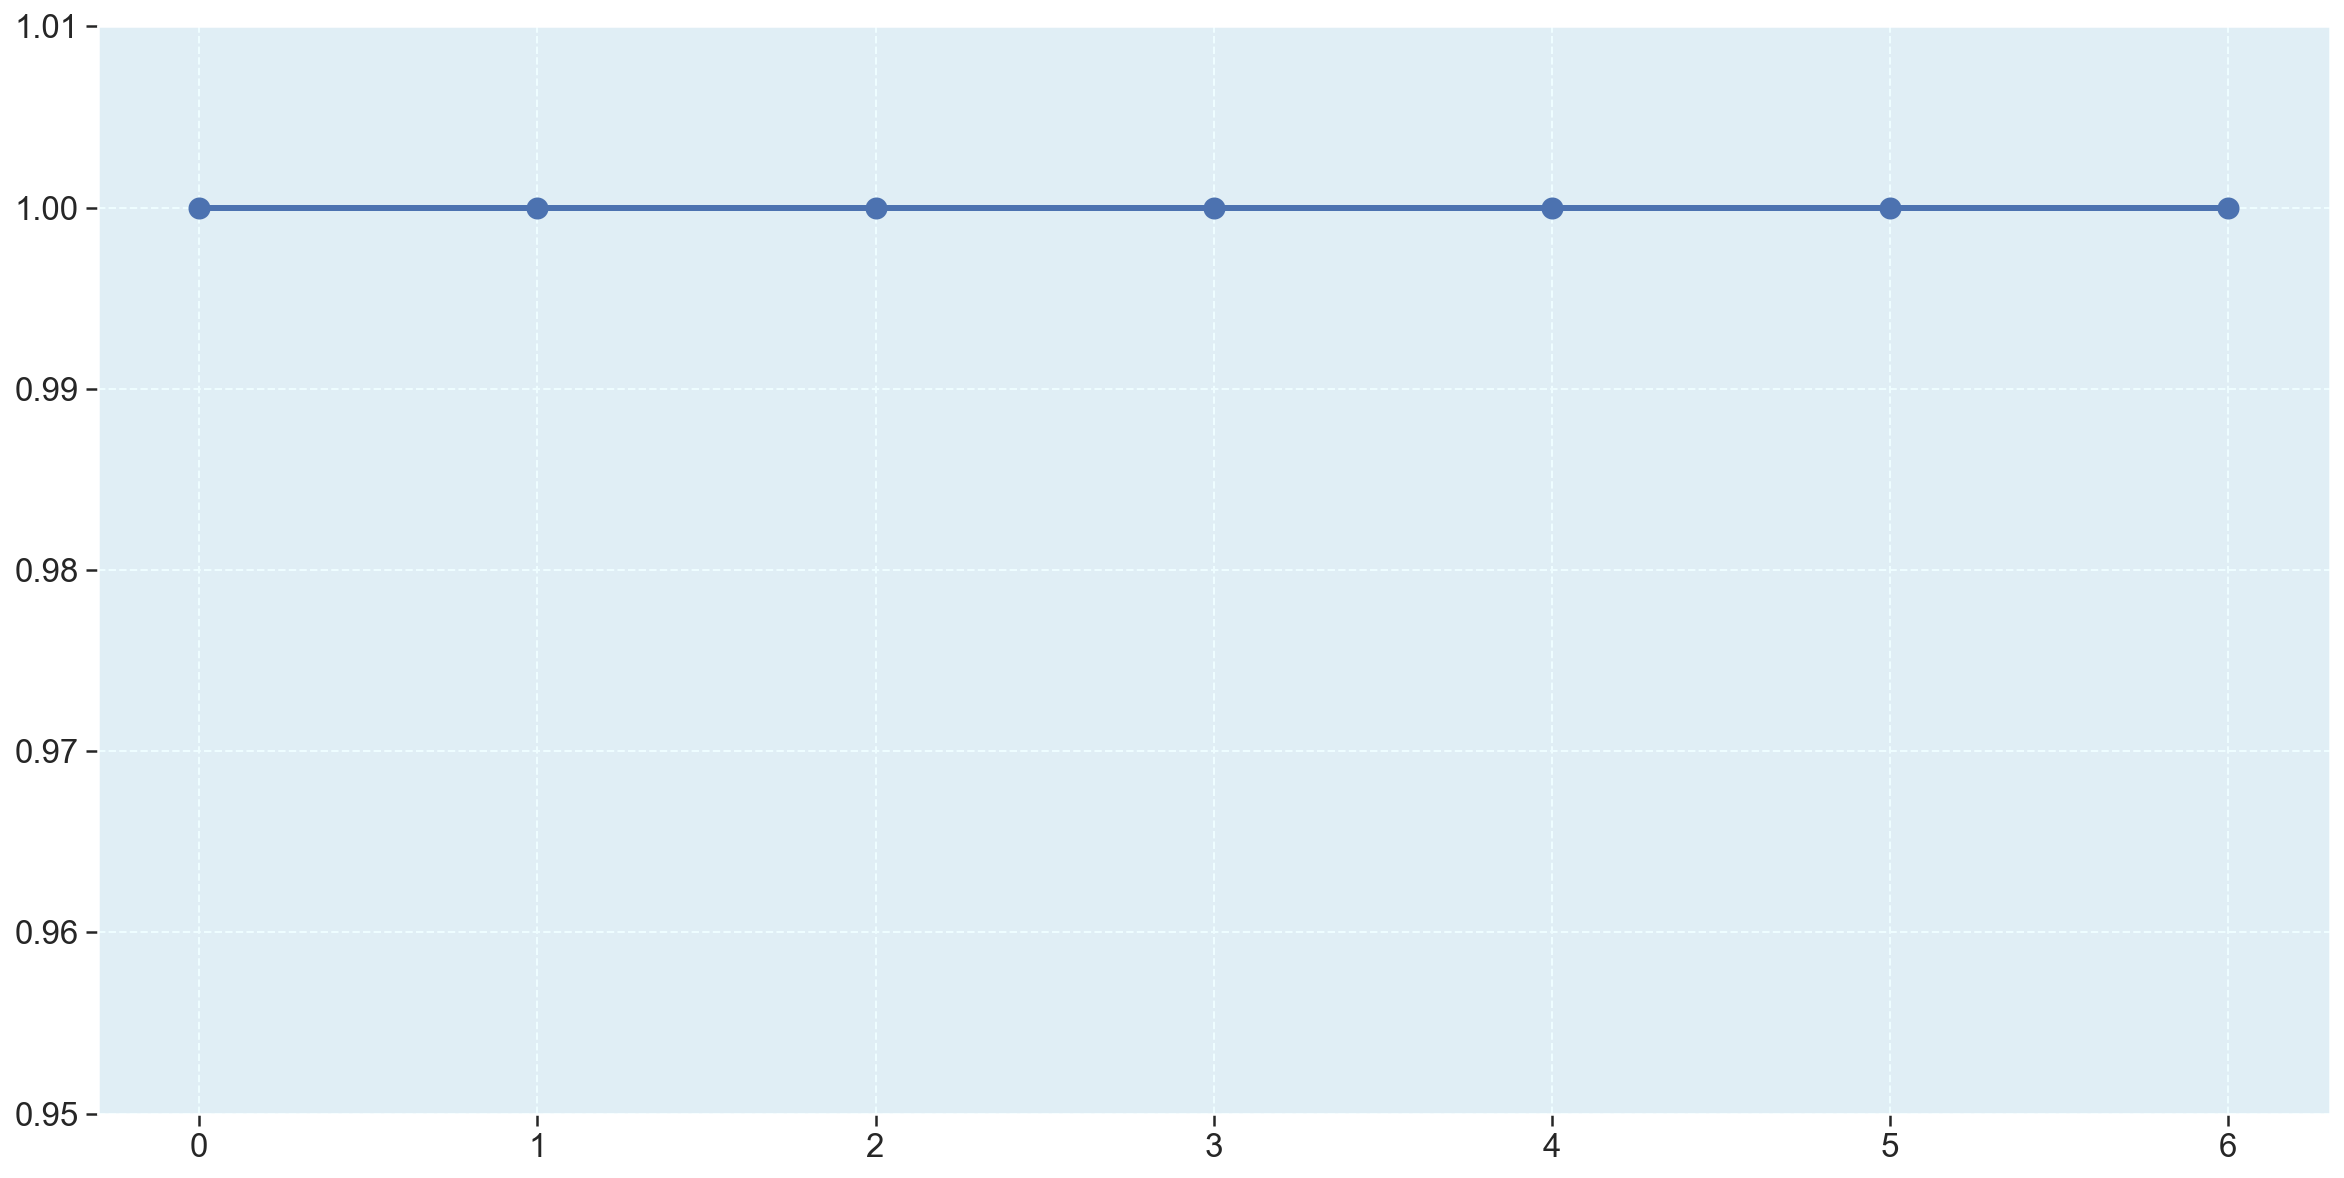

In [32]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repos_metrics_list[0]['em3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.95,1.01, color="#c9f9ff", alpha=0.3)

plt.ylim(.95,1.01)

### All metrics

(-0.02, 1.02)

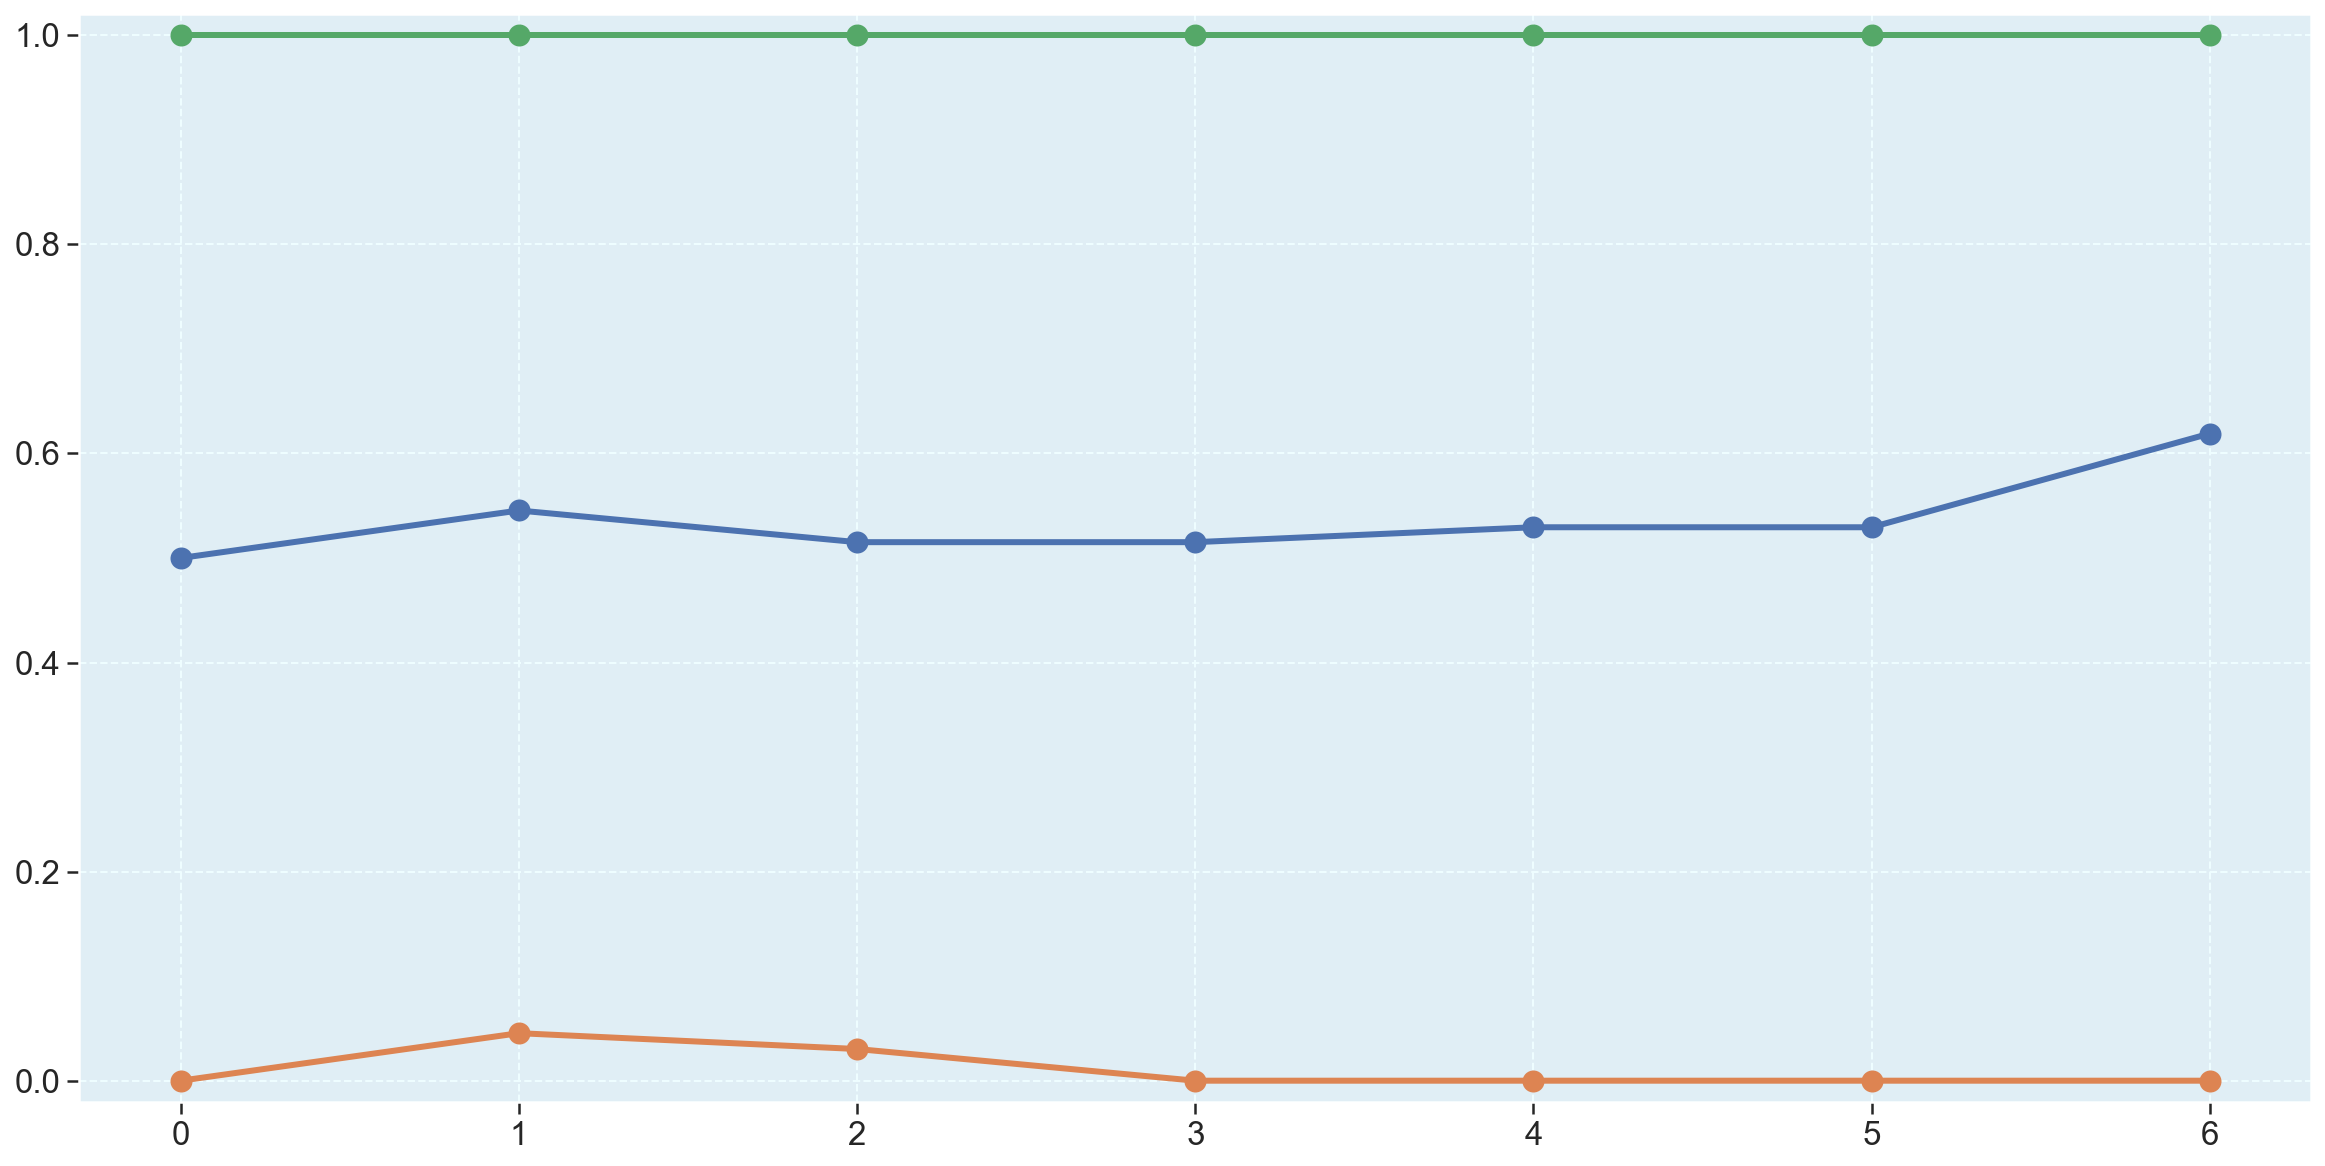

In [33]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repos_metrics_list[0]['em1'], linewidth=3, marker='o', markersize=10)
plt.plot(repos_metrics_list[0]['em2'], linewidth=3, marker='o', markersize=10)
plt.plot(repos_metrics_list[0]['em3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

### Setting measures weighs

In [34]:
# wem1 = 33%
# wem2 = 33%
# wem3 = 33%

wem1=wem2=wem3 = 0.3374
SC_Modifiability_EM_Weights = np.array([wem1, wem2, wem3])

## Defining Modifiability quality sub-characteristic tensors per microservice.

In [35]:
def create_sc_tensor(measures_list, size_z):

    tensor_sc_measures = ts.tensor(measures_list).reshape((measures_list.shape[0],measures_list.shape[1],size_z))

    return tensor_sc_measures

repos_sc_measures_list = []

for repo_measures in repos_metrics_list:
    repos_sc_measures_list.append(np.array([repo_measures['em1'].astype(float),
                                            repo_measures['em2'].astype(float),
                                            repo_measures['em3'].astype(float)]))

t_sc_modifiability_tensor_list = []

t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[0], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[1], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[2], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[3], 1))

print("Modifiability Tensor dimensions = " + str(t_sc_modifiability_tensor_list[0].ndim))

t_sc_modifiability_tensor_list[0]

Modifiability Tensor dimensions = 3


array([[[0.5       ],
        [0.54545455],
        [0.51515152],
        [0.51515152],
        [0.52941176],
        [0.52941176],
        [0.61904762]],

       [[0.        ],
        [0.04545455],
        [0.03030303],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]]])

# Weighting tensor of the Modifiability Sub-Characteristic at measure level.

In [36]:
t_sc_modifiability_weighted_list = []

for i in range(len(t_sc_modifiability_tensor_list)):

    t_sc_modifiability_weighted = np.empty(t_sc_modifiability_tensor_list[i].shape)

    # t_sc_modifiability_frontend[:, :, 0][j] = Slice in a specific dimension and multiply by respective weight
    for j in range(t_sc_modifiability_tensor_list[i].ndim):
        t_sc_modifiability_weighted[:, :, 0][j] = np.tensordot(t_sc_modifiability_tensor_list[i][:,:,0][j],
                                                               SC_Modifiability_EM_Weights[j], 0)
    t_sc_modifiability_weighted_list.append(t_sc_modifiability_weighted)

t_sc_modifiability_weighted_list[0]


array([[[0.1687    ],
        [0.18403636],
        [0.17381212],
        [0.17381212],
        [0.17862353],
        [0.17862353],
        [0.20886667]],

       [[0.        ],
        [0.01533636],
        [0.01022424],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.3374    ],
        [0.3374    ],
        [0.3374    ],
        [0.3374    ],
        [0.3374    ],
        [0.3374    ],
        [0.3374    ]]])

# Aggregating and weighting SC_Modifiability quality characteristic tensor

In [37]:
wsc1 = 1

t_sc_modifiability_agregated_list = []

for i in range(len(t_sc_modifiability_weighted_list)):

    #t_sc_modifiability_agregated = np.empty(t_sc_modifiability_weighted_list[i].shape)
    t_sc_modifiability_agregated = np.empty([t_sc_modifiability_weighted_list[i].shape[1]])

    for j in range(t_sc_modifiability_weighted_list[i].shape[1]):
        t_sc_modifiability_agregated[j] = np.linalg.norm(t_sc_modifiability_weighted_list[i][:,:,0][:,j])

    t_sc_modifiability_agregated_list.append(np.tensordot(t_sc_modifiability_agregated, wsc1, 0))

t_sc_modifiability_agregated_list[0]

array([0.37722467, 0.38463404, 0.37967611, 0.37953842, 0.3817658 ,
       0.3817658 , 0.39681739])

# Agregating and Weighting Maintainability quality characteristic tensor

In [38]:
wc1 = 1

t_c_maintainability_agregated_list = []

for i in range(len(t_sc_modifiability_agregated_list)):

    t_c_maintainability_agregated = np.empty([t_sc_modifiability_agregated_list[i].shape[0]])

    for j in range(t_sc_modifiability_agregated_list[i].shape[0]):
        t_c_maintainability_agregated[j] = np.linalg.norm(t_sc_modifiability_weighted_list[i][:,:,0][:,j])

    t_c_maintainability_agregated_list.append(np.tensordot(t_c_maintainability_agregated, wc1, 0))

t_c_maintainability_agregated_list[0]


array([0.37722467, 0.38463404, 0.37967611, 0.37953842, 0.3817658 ,
       0.3817658 , 0.39681739])

# Comparison of the product quality of two Releases. This comparison is obtained from cosine similarity between tensors.

In [39]:
SQC_1 = t_c_maintainability_agregated_list[0][0] # first_release from frontend repository
SQC_2 = t_c_maintainability_agregated_list[0][6] # last_release from frontend repository

distance.cosine(SQC_1, SQC_2)

0.0

# Intensity of difference between releases comparison

In [40]:
intensity_difference = SQC_2 - SQC_1

intensity_difference

0.019592726527793647

In [41]:
for i in range(len(repos_metrics_list)):
    repos_metrics_list[i]['Modifiability'] = t_c_maintainability_agregated_list[i].tolist()
    repos_metrics_list[i]['Maintainability'] = t_c_maintainability_agregated_list[i].tolist()
    repos_metrics_list[i]['SQC'] = t_c_maintainability_agregated_list[i].tolist()


column_names = ["em1", "em2", "em3", "repository", "version", "Modifiability", "Maintainability", "SQC" ]

#for i in range(len(repos_metrics_list)):
#    repos_metrics_list[i] = repos_metrics_list[i].reindex(columns=column_names)

#repos_metrics_list.reindex(columns=column_names)

repos_metrics_list[0]

,em1,em2,em3,repository,version,Modifiability,Maintainability,SQC
0,0.500000,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23,0.377225,0.377225,0.377225
1,0.545455,0.045455,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05,0.384634,0.384634,0.384634
2,0.515152,0.030303,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11,0.379676,0.379676,0.379676
3,0.515152,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15,0.379538,0.379538,0.379538
4,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17,0.381766,0.381766,0.381766
5,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-22,0.381766,0.381766,0.381766
6,0.619048,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-24,0.396817,0.396817,0.396817


# Plotting the total quality(SQC) from Kokama frontend microservice

(0.32, 0.44)

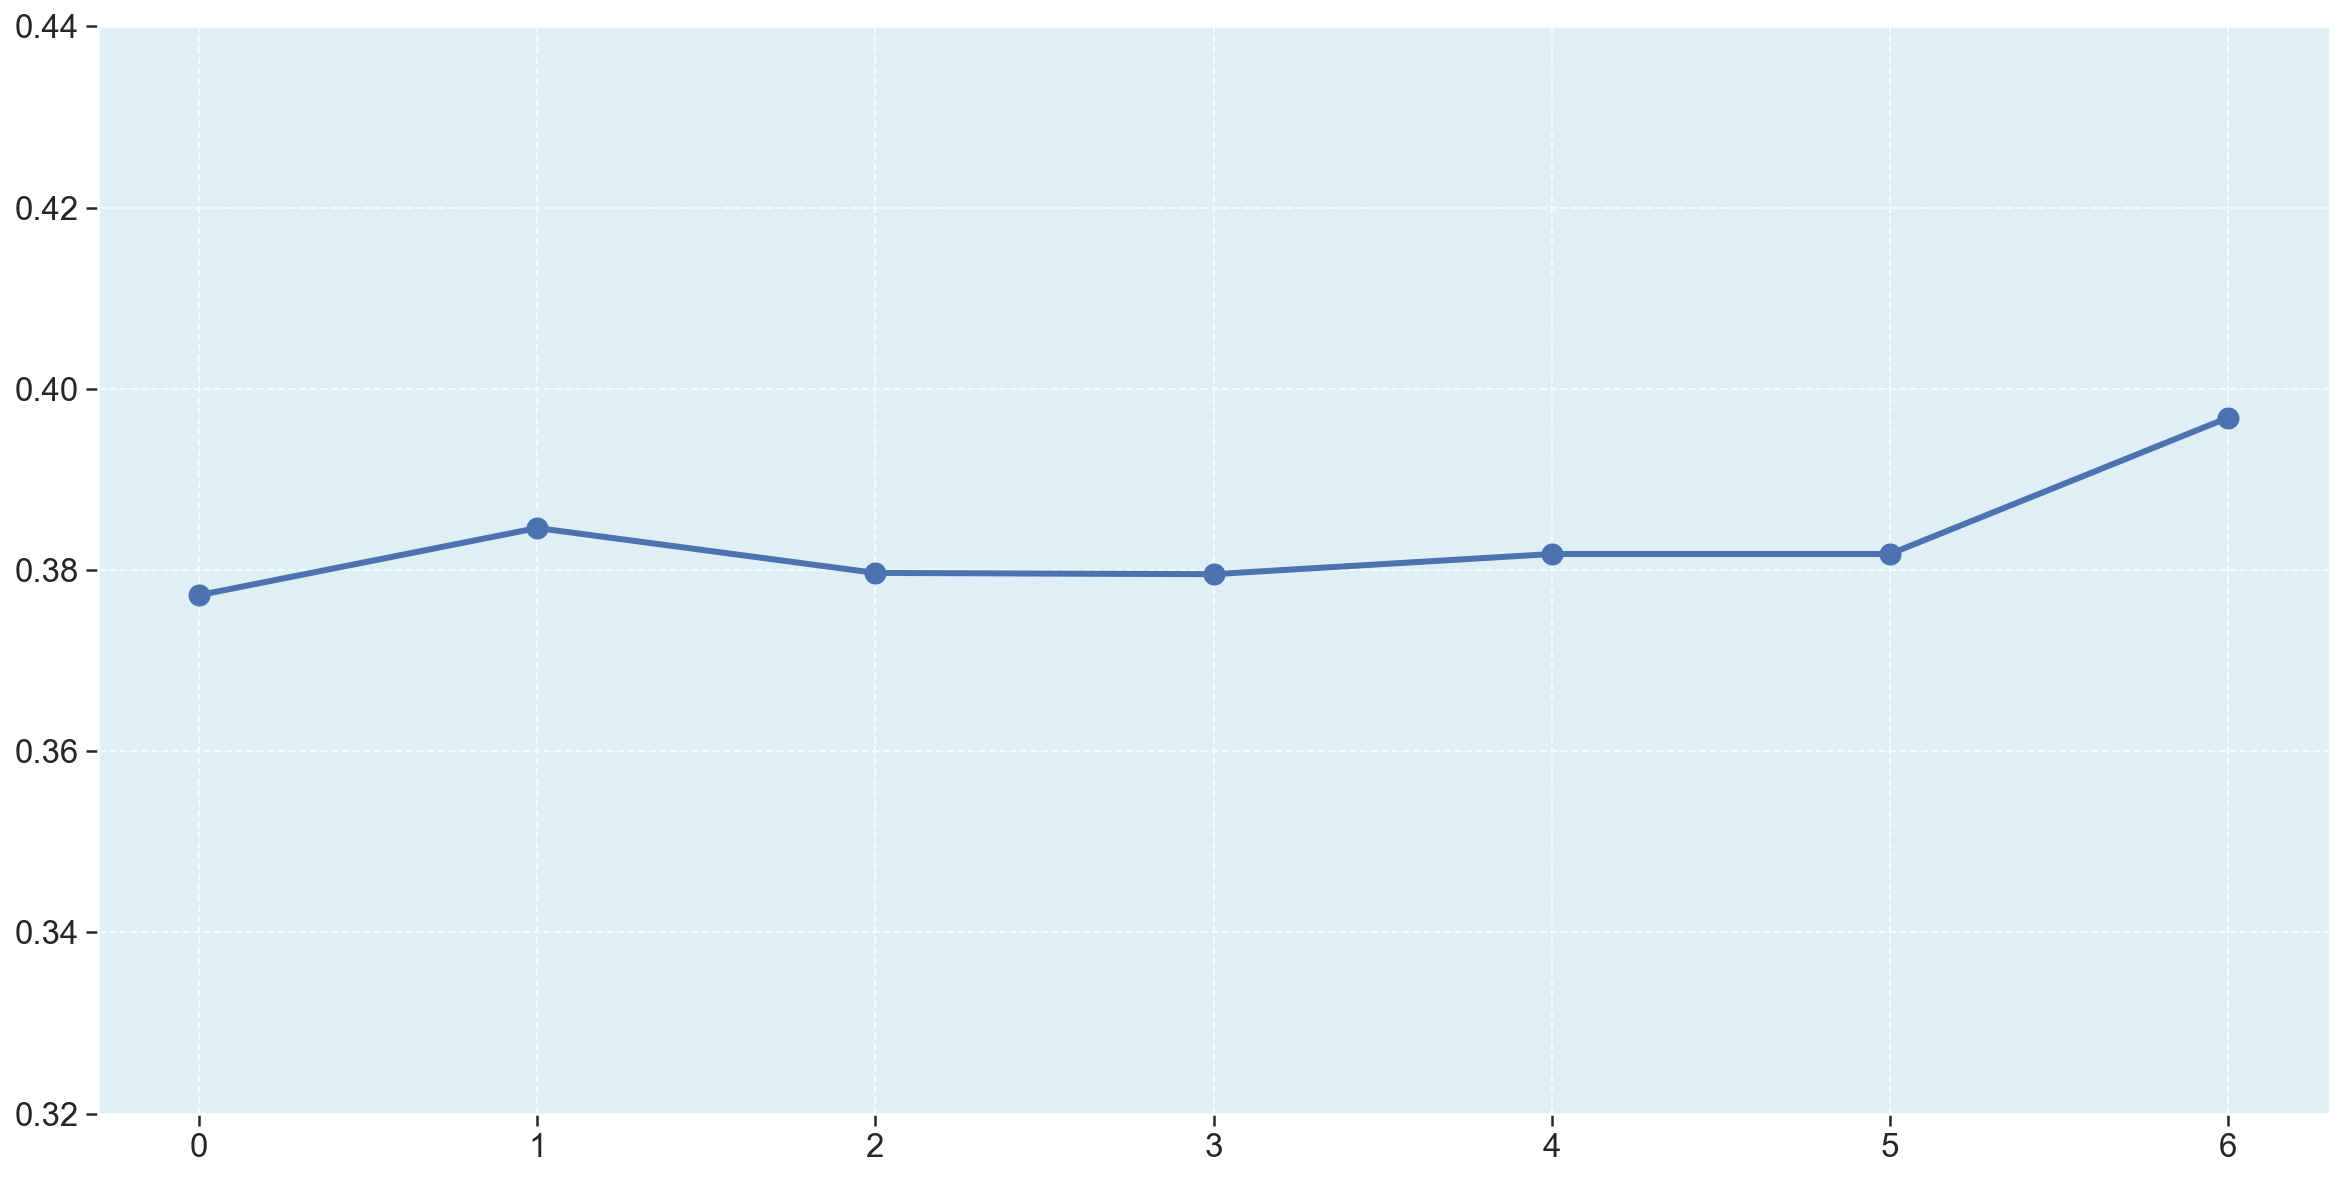

In [42]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2020_2-Projeto-Kokama-Front-end"]['SQC'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.32,.44, color="#c9f9ff", alpha=0.3)

plt.ylim(.32,.44)

# Plotting the total quality(SQC) from all Kokama microservices

(0.32, 0.45)

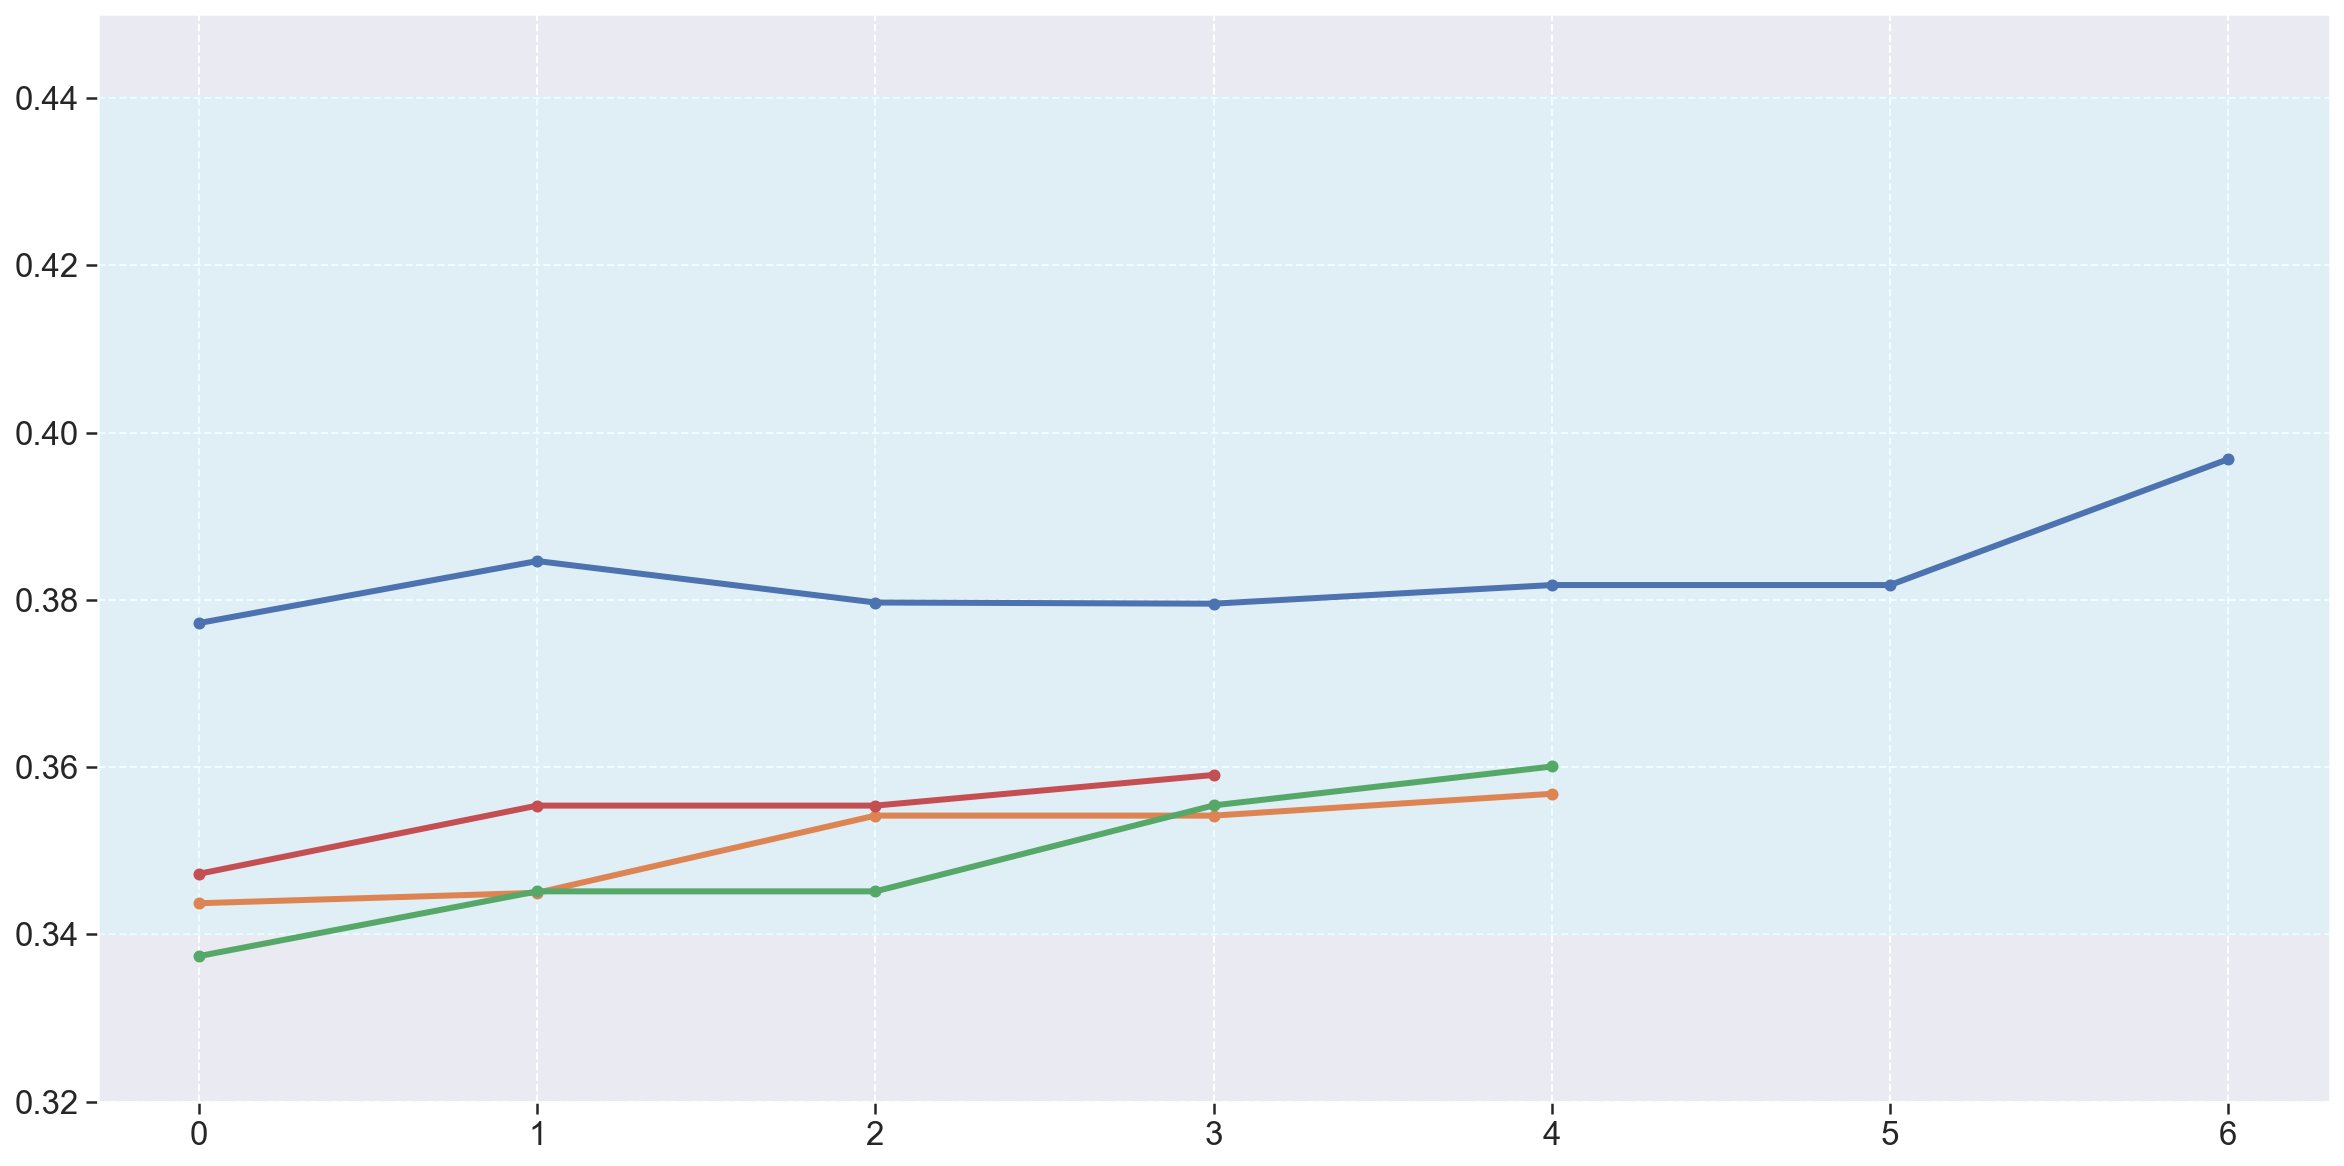

In [43]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repository_metrics["2020_2-Projeto-Kokama-Front-end"]['SQC'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Traducao"]['SQC'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Usuario"]['SQC'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["2020_2-Projeto-Kokama-Ensino"]['SQC'], linewidth=3, marker='o', markersize=5)

# Background color
plt.axhspan(.34,.44, color="#c9f9ff", alpha=0.3)

plt.ylim(.32,.45)

# Plotting the dataset with MeasureSoftGram's calculations

In [44]:
metrics_df = pd.concat([repository_metrics["2020_2-Projeto-Kokama-Front-end"],
                        repository_metrics["2020_2-Projeto-Kokama-Traducao"],
                        repository_metrics["2020_2-Projeto-Kokama-Usuario"],
                        repository_metrics["2020_2-Projeto-Kokama-Ensino"]], ignore_index=True)

metrics_df

,em1,em2,em3,repository,version,Modifiability,Maintainability,SQC
0,0.500000,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23,0.377225,0.377225,0.377225
1,0.545455,0.045455,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05,0.384634,0.384634,0.384634
2,0.515152,0.030303,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11,0.379676,0.379676,0.379676
3,0.515152,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15,0.379538,0.379538,0.379538
4,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17,0.381766,0.381766,0.381766
5,0.529412,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-22,0.381766,0.381766,0.381766
6,0.619048,0.000000,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-24,0.396817,0.396817,0.396817
7,0.173913,0.086957,1.0,2020_2-Projeto-Kokama-Traducao,2021-03-23,0.343719,0.343719,0.343719
8,0.190476,0.095238,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-05,0.344966,0.344966,0.344966
9,0.285714,0.142857,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-06,0.354196,0.354196,0.354196


# Generating dataset in .CSV format

In [45]:
metrics_df.to_excel('data/fga-eps-mds-2020-2-data/kokama/measuresoftgram-kokama-dataset-23-03-2021-24-05-2021-excel.xlsx', header=False, index = False)
metrics_df.to_csv('data/fga-eps-mds-2020-2-data/kokama/measuresoftgram-kokama-dataset-23-03-2021-24-05-2021-csv.csv', header=False, index = False)
#metrics_df.to_json('data/metrics_df_json.json', index = False)


# Reading MeasureSoftGram and Q-Rapids dataset .CSV

In [46]:
qrapids_df = pd.read_csv('data/fga-eps-mds-2020-2-data/kokama/qrapids-kokama-dataset-23-03-2021-24-05-2021-csv.csv', sep=',', header=None,
                              names=['m1', 'm2', 'm3', 'repository', 'version', 'asc1', 'ac1','total'], dtype='a')

qrapids_df

,m1,m2,m3,repository,version,asc1,ac1,total
0,0.5,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23,0.495,0.495,0.495
1,0.5454545454545454,0.045454545454545456,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05,0.525,0.525,0.525
2,0.5151515151515151,0.030303030303030304,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11,0.51,0.51,0.51
3,0.5151515151515151,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15,0.5,0.5,0.5
4,0.5294117647058824,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17,0.5047058823529412,0.5047058823529412,0.5047058823529412
5,0.5294117647058824,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-22,0.5047058823529412,0.5047058823529412,0.5047058823529412
6,0.6190476190476191,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-24,0.5342857142857143,0.5342857142857143,0.5342857142857143
7,0.17391304347826086,0.08695652173913043,1.0,2020_2-Projeto-Kokama-Traducao,2021-03-23,0.41608695652173916,0.41608695652173916,0.41608695652173916
8,0.19047619047619047,0.09523809523809523,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-05,0.4242857142857143,0.4242857142857143,0.4242857142857143
9,0.2857142857142857,0.14285714285714285,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-06,0.4714285714285714,0.4714285714285714,0.4714285714285714


In [47]:
measuresoftgram_df = pd.read_csv('data/fga-eps-mds-2020-2-data/kokama/measuresoftgram-kokama-dataset-23-03-2021-24-05-2021-csv.csv', sep=',',
                                 header=None, names=column_names, dtype='a')

measuresoftgram_df

,em1,em2,em3,repository,version,Modifiability,Maintainability,SQC
0,0.5,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-03-23,0.3772246678042145,0.3772246678042145,0.3772246678042145
1,0.5454545454545454,0.045454545454545456,1.0,2020_2-Projeto-Kokama-Front-end,2021-04-05,0.384634043202214,0.384634043202214,0.384634043202214
2,0.5151515151515151,0.030303030303030304,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-11,0.379676110143115,0.379676110143115,0.379676110143115
3,0.5151515151515151,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-15,0.3795384216126967,0.3795384216126967,0.3795384216126967
4,0.5294117647058824,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-17,0.38176579896517127,0.38176579896517127,0.38176579896517127
5,0.5294117647058824,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-22,0.38176579896517127,0.38176579896517127,0.38176579896517127
6,0.6190476190476191,0.0,1.0,2020_2-Projeto-Kokama-Front-end,2021-05-24,0.39681739433200813,0.39681739433200813,0.39681739433200813
7,0.17391304347826086,0.08695652173913043,1.0,2020_2-Projeto-Kokama-Traducao,2021-03-23,0.3437189009544659,0.3437189009544659,0.3437189009544659
8,0.19047619047619047,0.09523809523809523,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-05,0.3449659628942478,0.3449659628942478,0.3449659628942478
9,0.2857142857142857,0.14285714285714285,1.0,2020_2-Projeto-Kokama-Traducao,2021-04-06,0.35419621680644753,0.35419621680644753,0.35419621680644753


# Statics Treatments

In [48]:
def is_normal(dist, alpha):

    k2, normal_Test_Pval = stats.normaltest(dist, axis=None)

    if (normal_Test_Pval > alpha): # alpha value is 0.05 or 5%
        return False

    return True

In [49]:
# alpha value is 0.05 or 5%
alpha = np.float64(0.05)

dist_control = qrapids_df["total"].to_numpy('float')
dist_predict = measuresoftgram_df["SQC"].to_numpy('float')


# Descriptive Statistics

In [50]:
print('Descriptive Statitics from Q-Rapids: '+ str(stats.describe(dist_control)))
print('Min: ' + str(dist_control.min(axis=0)))
print('Max: ' + str(dist_control.max(axis=0)))
print('Mean: '+ str(dist_control.mean(axis=0)))
print('Mode: '+ str(stats.mode(dist_control)))
print('Median: '+ str(np.median(dist_control, axis=0)))
print('Std: ' + str(dist_control.std(axis=0)))
print('Variance: ' + str(dist_control.var(axis=0)) + '\n')

print('Descriptive Statitics from MeasuresotGram: '+ str(stats.describe(dist_predict)))
print('Min: ' + str(dist_predict.min(axis=0)))
print('Max: ' + str(dist_predict.max(axis=0)))
print('Mean: '+ str(dist_predict.mean(axis=0)))
print('Mode: '+ str(stats.mode(dist_predict)))
print('Median: '+ str(np.median(dist_predict, axis=0)))
print('Std: ' + str(dist_predict.std(axis=0)))
print('Variance: ' + str(dist_predict.var(axis=0)))

Descriptive Statitics from Q-Rapids: DescribeResult(nobs=21, minmax=(0.33, 0.5342857142857143), mean=0.4677405574939006, variance=0.0022053287124683177, skewness=-1.1524101830258897, kurtosis=1.537451282804855)
Min: 0.33
Max: 0.5342857142857143
Mean: 0.4677405574939006
Mode: ModeResult(mode=array([0.4224]), count=array([2]))
Median: 0.47347826086956524
Std: 0.04582917258137698
Variance: 0.002100313059493636

Descriptive Statitics from MeasuresotGram: DescribeResult(nobs=21, minmax=(0.3374, 0.39681739433200813), mean=0.3616929420755124, variance=0.0002831791197599926, skewness=0.518051468880043, kurtosis=-0.9545041788992576)
Min: 0.3374
Max: 0.39681739433200813
Mean: 0.3616929420755124
Mode: ModeResult(mode=array([0.34513893]), count=array([2]))
Median: 0.35541544188836705
Std: 0.016422374973536002
Variance: 0.00026969439977142154


#  Normality Test

In [51]:
print('*** Testing Normality - D’Agostino ****')
if is_normal(dist_predict, alpha):
    print("MeasuresftGram has  a normal distribution")
else:
    print("MeasuresftGram has not a normal distribution")

if is_normal(dist_control, alpha):
    print("Q-Rapids has a normal distribution")
else:
    print("Q-Rapids has not a normal distribution")

*** Testing Normality - D’Agostino ****
MeasuresftGram has not a normal distribution
Q-Rapids has a normal distribution


# Histogram

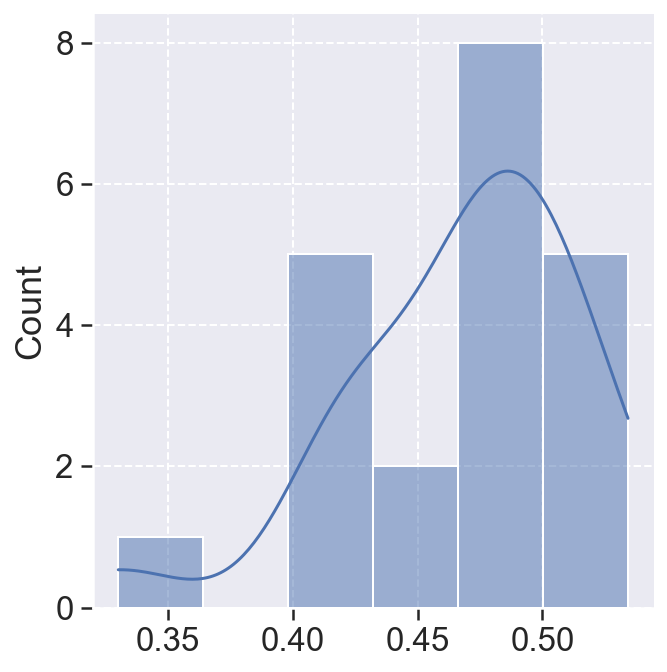

In [52]:
sns.displot(data=dist_control, kde=True)

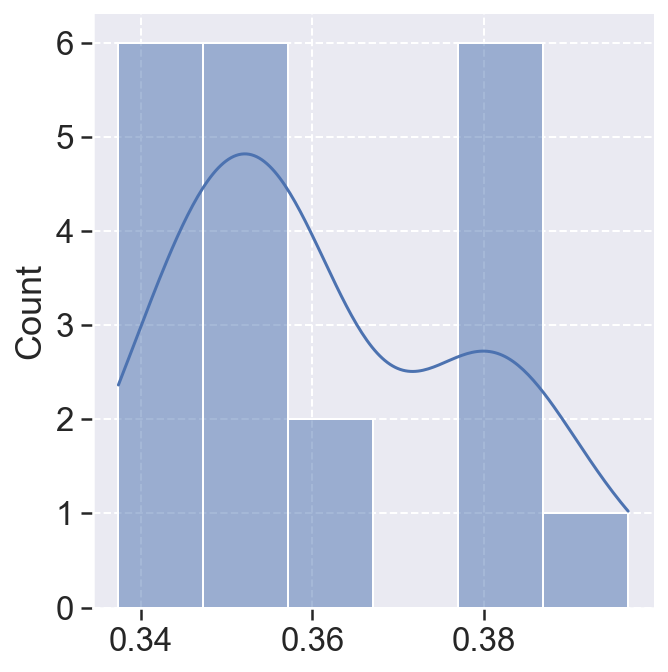

In [53]:
sns.displot(data=dist_predict, kde=True)

<Figure size 2160x1440 with 0 Axes>

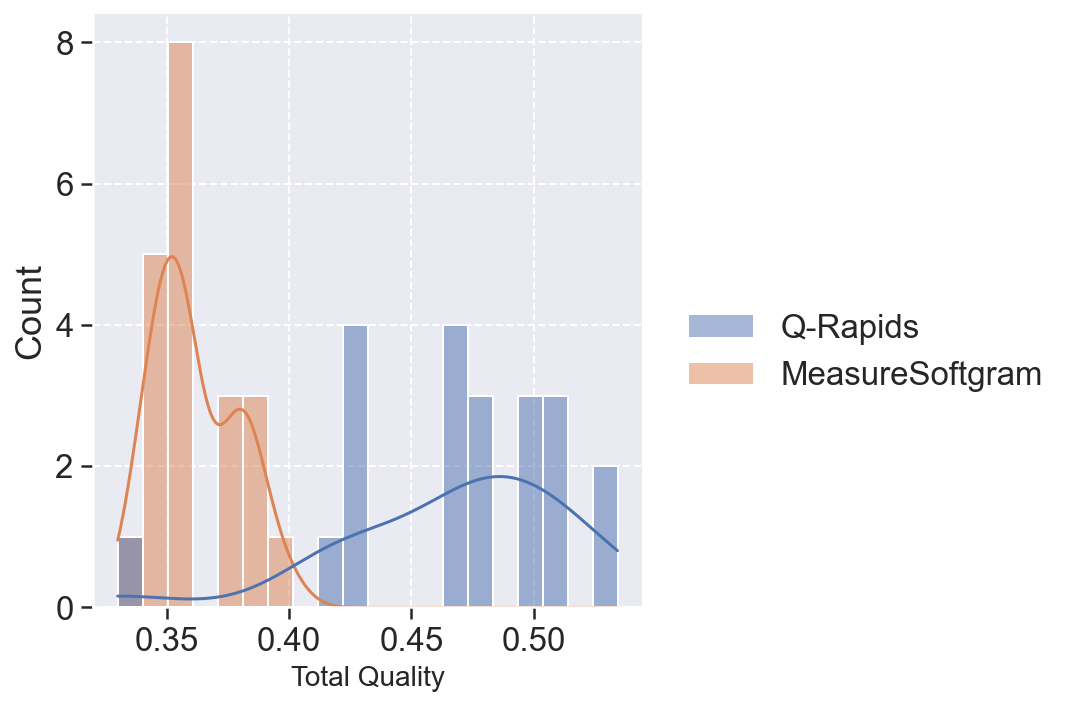

In [54]:
a = pd.DataFrame({'Q-Rapids' : qrapids_df.iloc[:,7].astype(float)})
b = pd.DataFrame({ 'MeasureSoftgram' : measuresoftgram_df.iloc[:,7].astype(float)})


df = a.append(b)

fig = plt.figure(figsize=(30, 20))

sns.displot(df, bins=20, kde=True)

plt.xlabel('Total Quality', fontsize=14)

plt.show()

# Boxplot

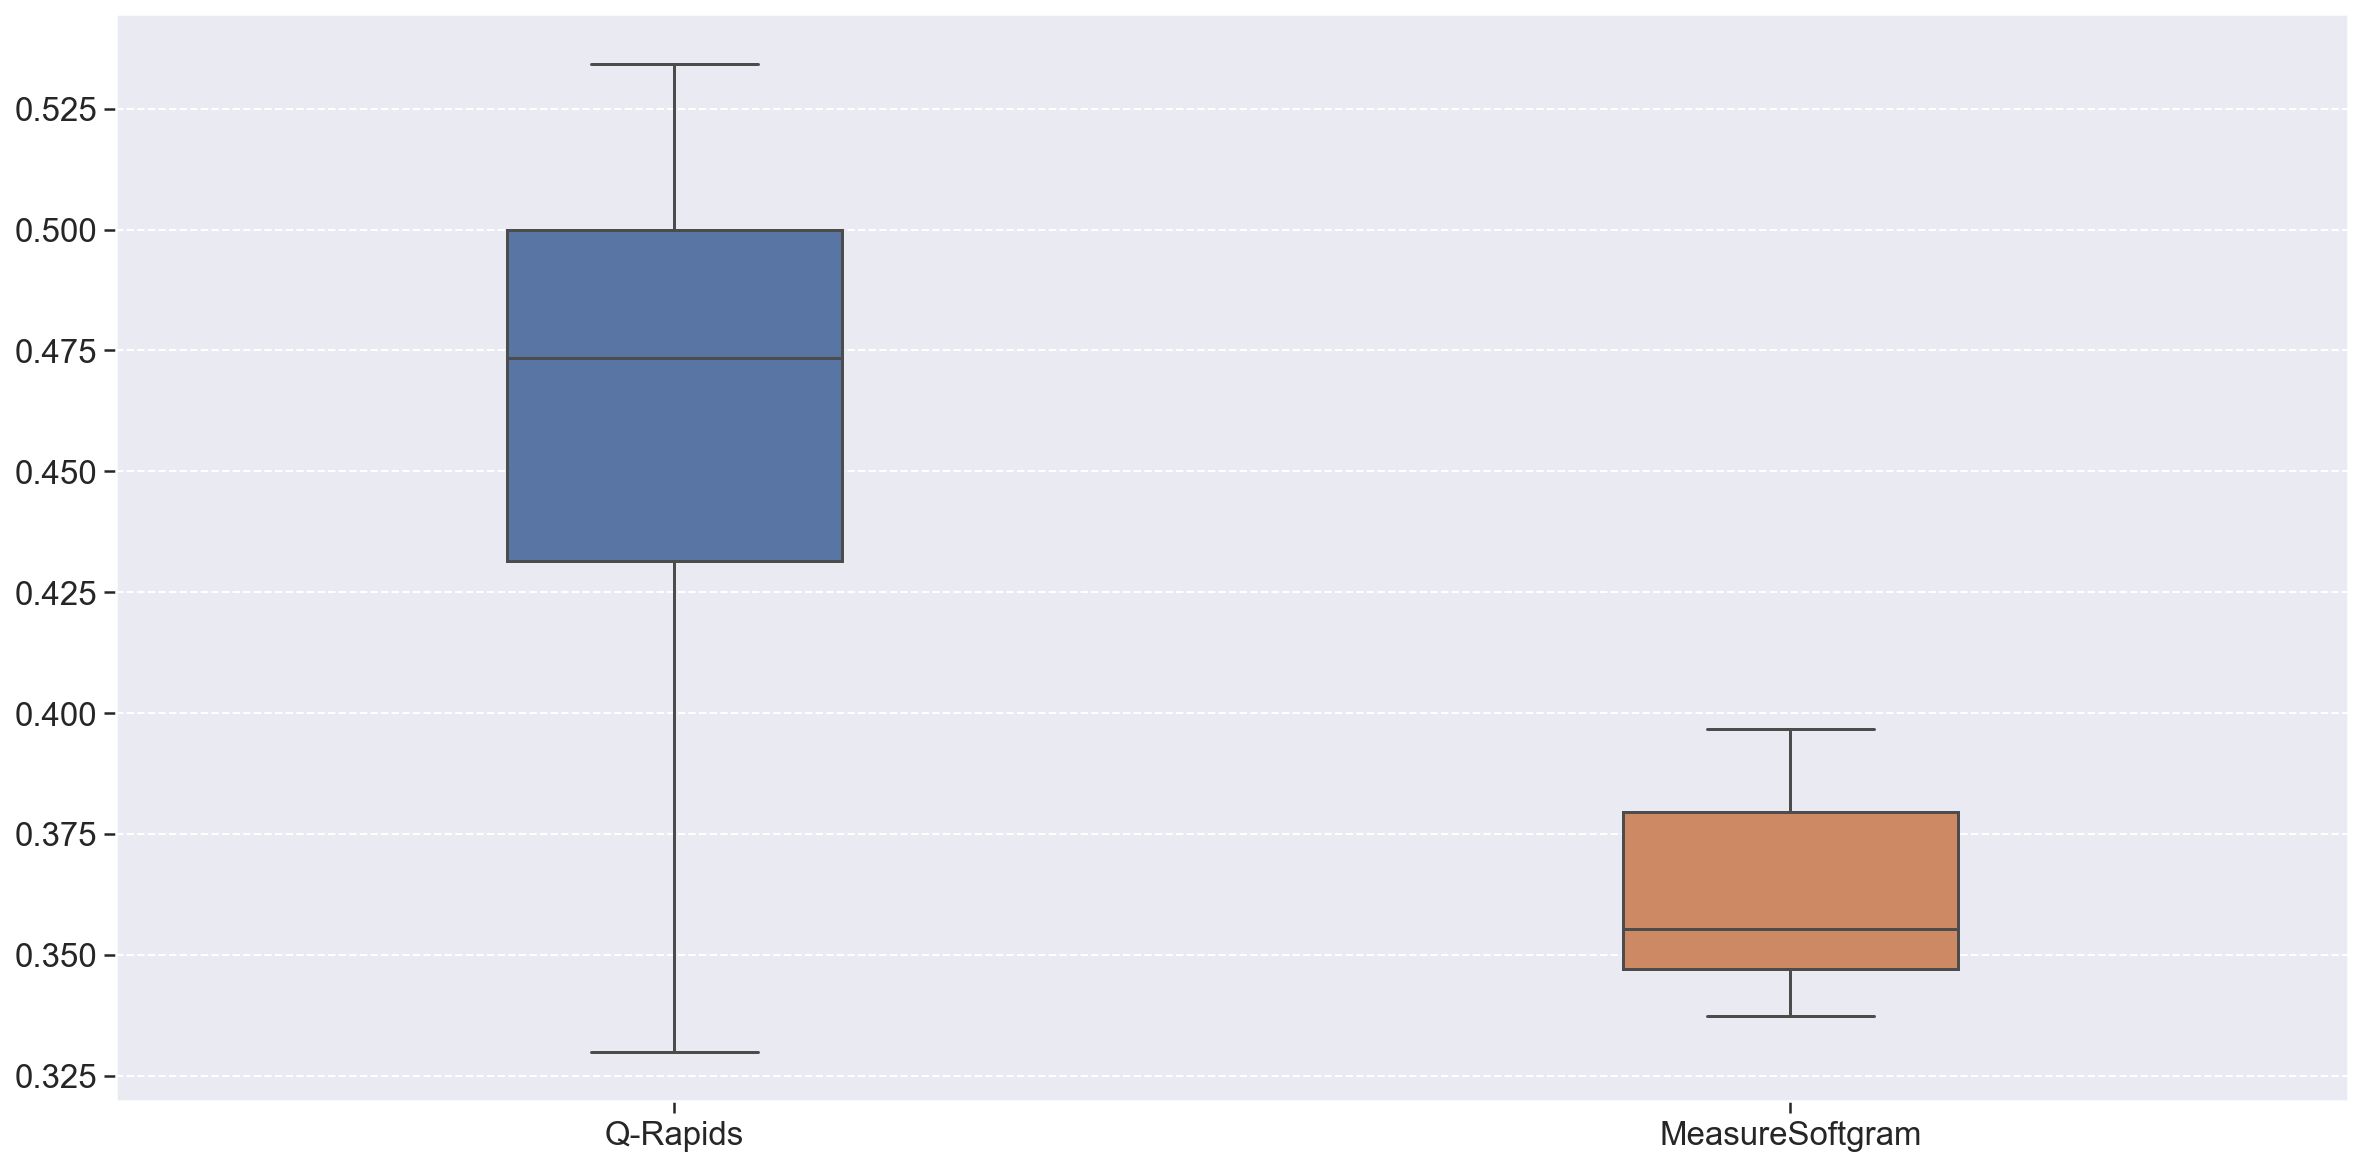

In [55]:
fig = plt.figure(figsize=(20, 10))
sns.boxplot(data=df, width=0.3)

plt.show()

# Scatter

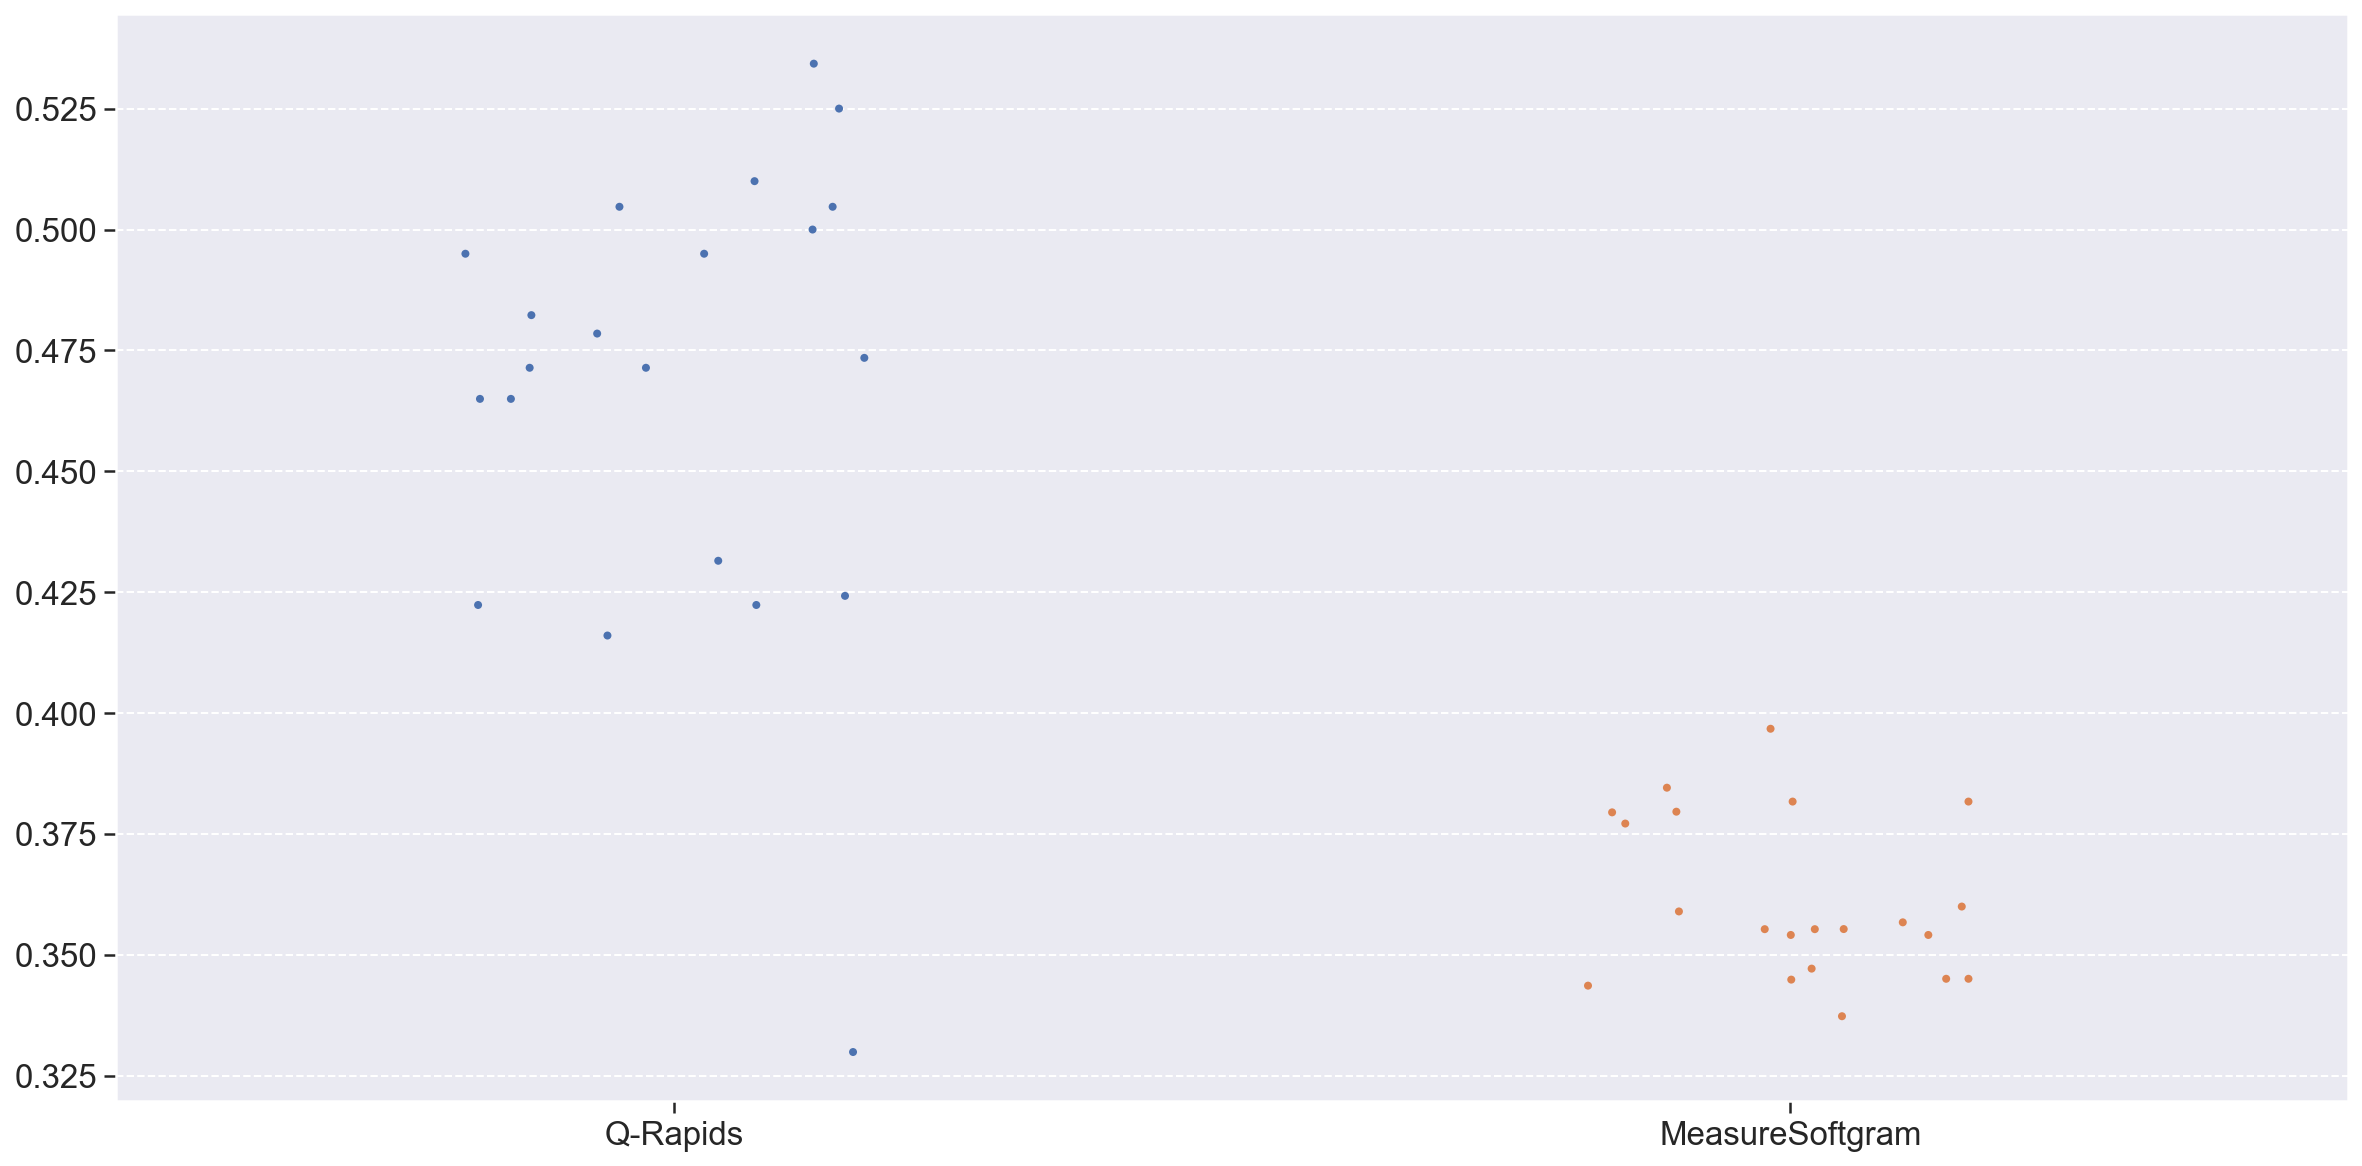

In [56]:
fig = plt.figure(figsize=(20, 10))
sns.stripplot(data=df, jitter=0.2, size=4)

plt.show()

# Hypothesis Test - **Effectiveness** - IEEE-Std-1061 Correlation Criteria - Square of the linear correlation coefficient (<em>R</em>).

#### <em>H</em><sub>1<sub>0</sub></sub>: if <em>R</em><sup>2</sup> is smaller than 0.8, it means that the variation observed in MeasureSoftGram is casual when compared with Q-Rapids.

#### <em>H</em><sub>1<sub>A</sub></sub>: if <em>R</em><sup>2</sup> is greater than 0.8, it means that at least 80% of the variation observed in MeasureSoftGram can be explained by the variation observed in Q-Rapids.

## <center> <em>H</em><sub>1<sub>0</sub></sub> : <em>R</em><sup>2</sup> <sub>(measuresoftgram_SQC, qrapids_TQ)</sub> < 0.8 </center>
## <center> <em>H</em><sub>1<sub>A</sub></sub> : <em>R</em><sup>2</sup> <sub>(measuresoftgram_SQC, qrapids_TQ)</sub> $\geq$ 0.8 </center>

************************ OLS Regression Plot *************************


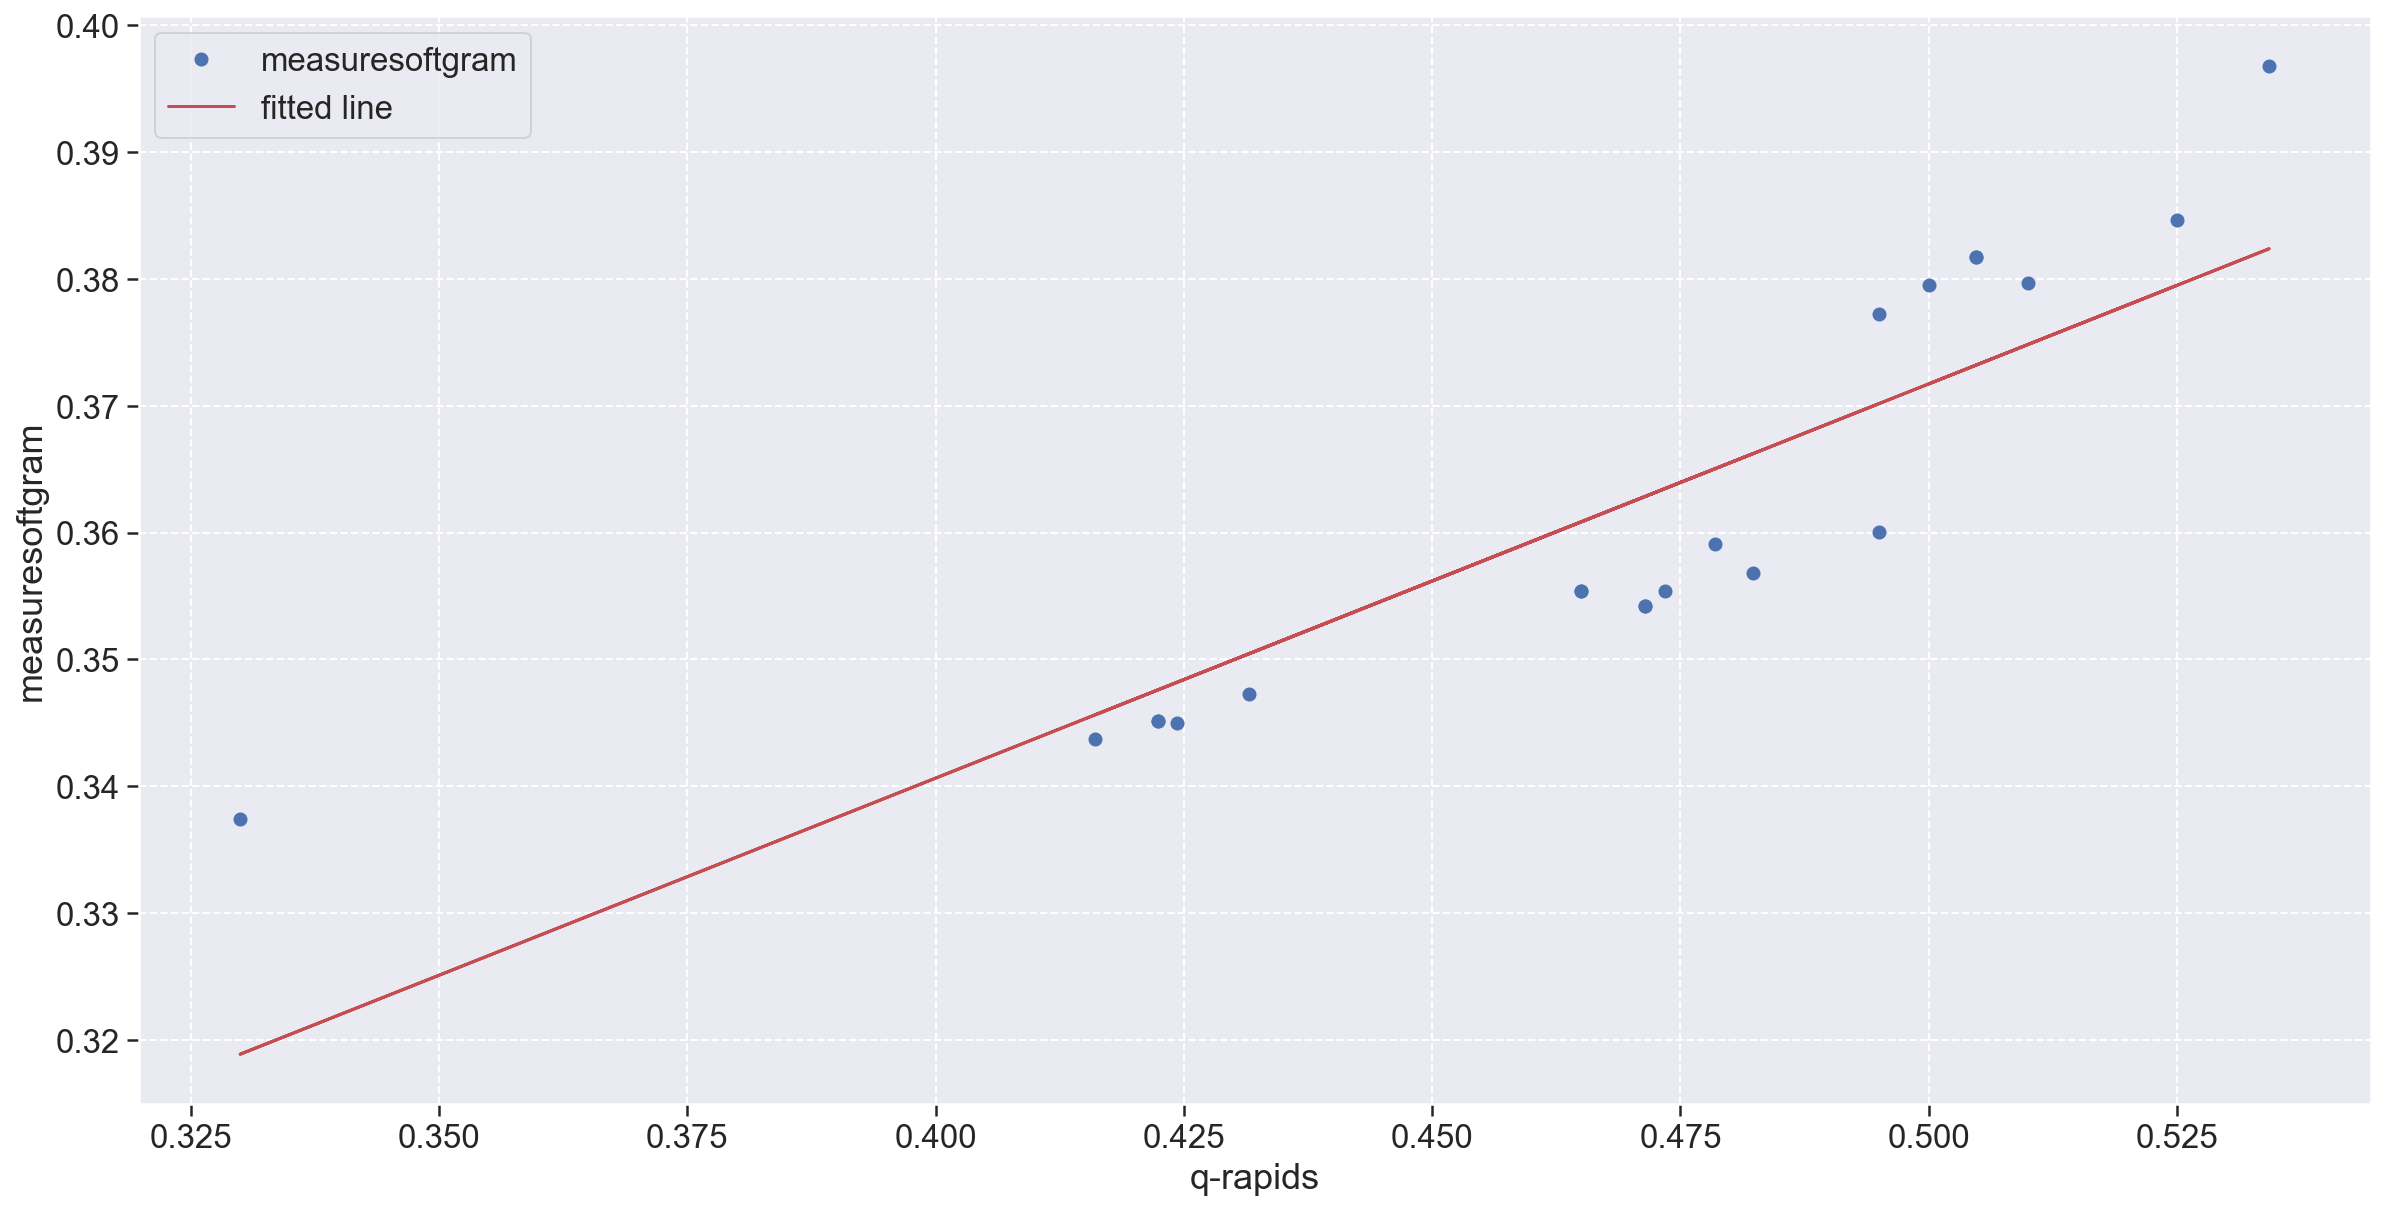

In [57]:
print('************************ OLS Regression Plot *************************')

fig = plt.figure(figsize=(20, 10))

res = stats.linregress(dist_control, dist_predict)

plt.plot(dist_control, dist_predict, 'o', label='measuresoftgram')
plt.plot(dist_control, res.intercept + res.slope * dist_control, 'r', label='fitted line')

plt.xlabel("q-rapids")
plt.ylabel("measuresoftgram")

plt.legend()

plt.show()

In [58]:
ols_df = pd.DataFrame({'qrapids': pd.to_numeric(qrapids_df["total"]), 'measuresoftgram': pd.to_numeric(measuresoftgram_df["SQC"])})

model = ols('measuresoftgram ~ qrapids', data=ols_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        measuresoftgram   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     58.07
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           3.42e-07
Time:                        11:11:11   Log-Likelihood:                 71.196
No. Observations:                  21   AIC:                            -138.4
Df Residuals:                      19   BIC:                            -136.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2162      0.019     11.270      0.0

eval_env: 1


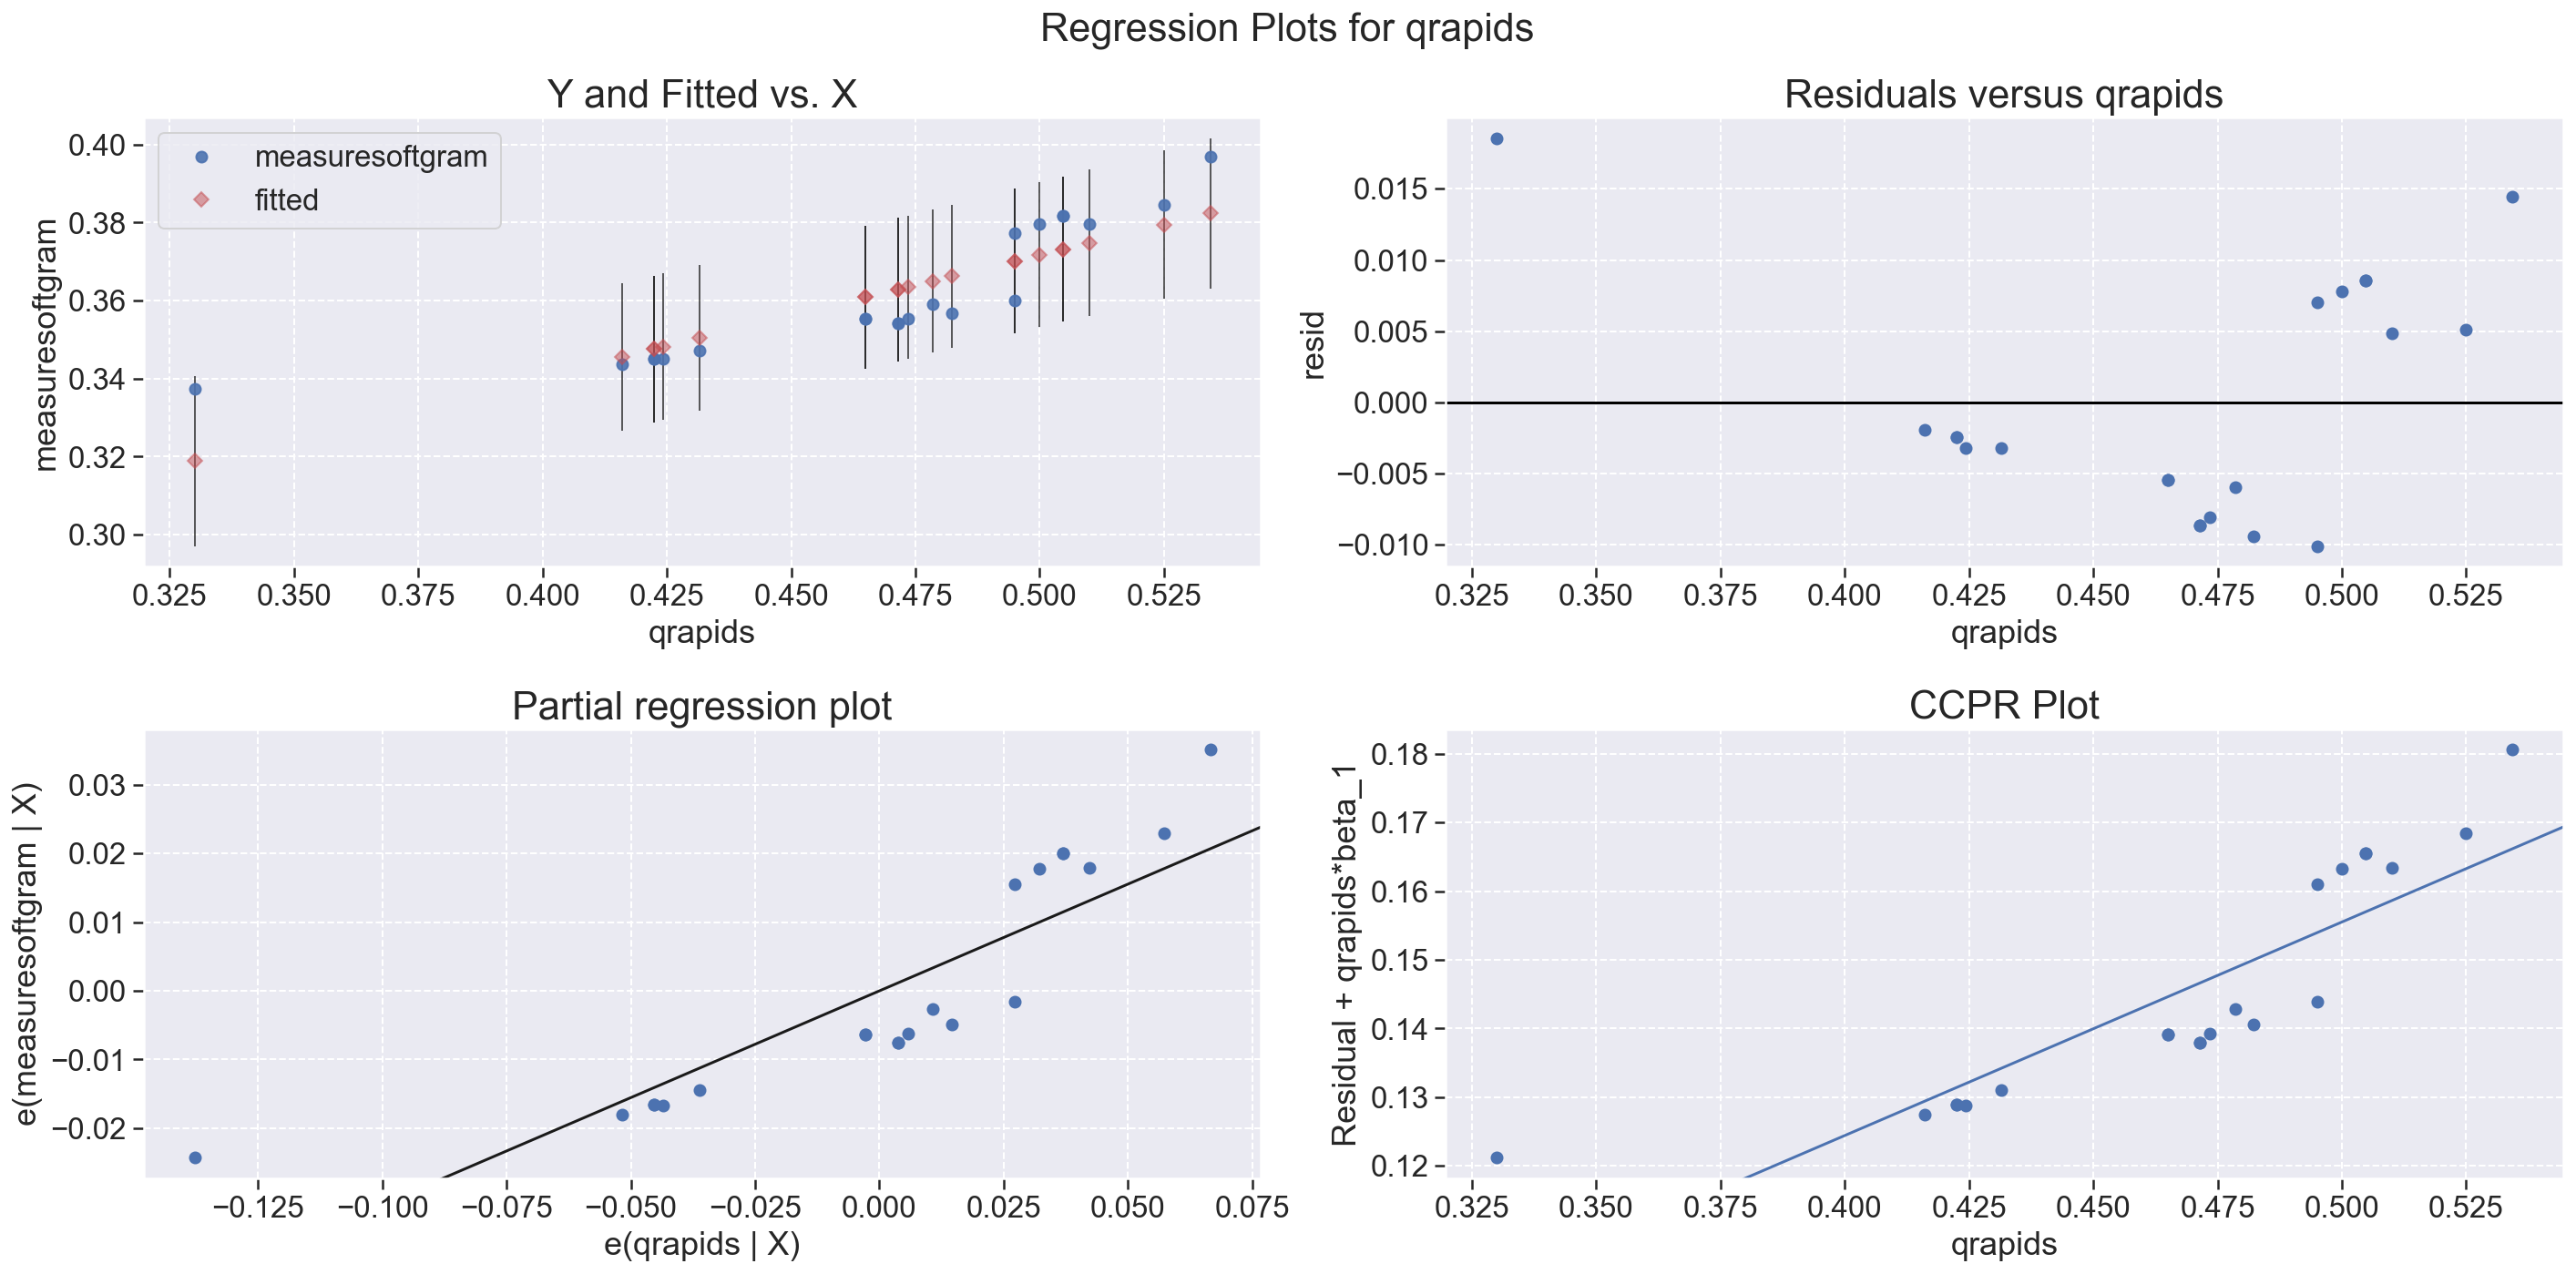

In [59]:
fig = plt.figure(figsize=(20, 10))

fig = sm.graphics.plot_regress_exog(model, 'qrapids', fig=fig)

plt.show()

# Hypothesis Test - **Efficiency** - IEEE-Std-1061 Tracking Criteria - Pearson correlation coefficient (<em>r</em>)

#### <em>H</em><sub>1<sub>0</sub></sub>: if <em>r</em><sup>2</sup> is smaller than 0 and close to -1, it means that the there is a high negative correlation between the two models.

#### <em>H</em><sub>1<sub>A</sub></sub>: if <em>r</em><sup>2</sup> is greater and equal than 0 and close to 1, it means that there is a high positive correlation between the two models.

## <center> <em>H</em><sub>1<sub>0</sub></sub> : <em>r</em><sup>2</sup> <sub>(measuresoftgram_SQC, qrapids_TQ)</sub> $\leq$ 0 </center>
## <center> <em>H</em><sub>1<sub>A</sub></sub> : <em>r</em><sup>2</sup> <sub>(measuresoftgram_SQC, qrapids_TQ)</sub> > 0 </center>

In [60]:
print('************ Spearman(r) test statistics *************')
r_stats, r_p_val = stats.spearmanr(dist_control, dist_predict)

print('Spearman(r) test statistics: '  + str(r_stats) + ' Spearman(r) test p-value: '  + str(r_p_val))
print('****************************************************' + '\n')

************ Spearman(r) test statistics *************
Spearman(r) test statistics: 0.9801368152326366 Spearman(r) test p-value: 8.21846121956345e-15
****************************************************



In [61]:
print('************ Person(r) test statistics *************')
r_stats, r_p_val = stats.pearsonr(dist_control, dist_predict)

print('Person(r) test statistics: '  + str(r_stats) + ' Person(r) test p-value: '  + str(r_p_val))
print('****************************************************' + '\n')

************ Person(r) test statistics *************
Person(r) test statistics: 0.8680246682182485 Person(r) test p-value: 3.4244515680496564e-07
****************************************************

